In [2]:
# import my library
import pandas as pd
import numpy as np
import network_analysis as net
import networkx as nx
import matplotlib.pyplot as plt
from netgraph import Graph
import random
import umap
%matplotlib inline
import cairo

In [2]:

my_allen_colors = net.get_allen_colors(r'C:\Users\ryansenne\PycharmProjects\network_analysis\csv_files\ROIs.csv')

In [3]:
# set some filepaths for network creation
ChR2_of = r'C:\Users\ryansenne\PycharmProjects\network_analysis\csv_files\ChR2_Large_Box.csv'
control_of = r'C:\Users\ryansenne\PycharmProjects\network_analysis\csv_files\Control_Large_Box.csv'
chr2_small =  r'C:\Users\ryansenne\PycharmProjects\network_analysis\csv_files\ChR2_Small_Box.csv'
control_small =  r'C:\Users\ryansenne\PycharmProjects\network_analysis\csv_files\Control_Small_Box.csv'
innate_recall =  r'C:\Users\ryansenne\PycharmProjects\network_analysis\csv_files\innate_recall.csv'
# innate_recall = r'C:\Users\Ryan Senne\PycharmProjects\network_analysis\csv_files\innate_recall.csv'

In [12]:
# chr2_lb = r'C:\Users\Ryan Senne\PycharmProjects\network_analysis\csv_files\ChR2_Large_Box.csv'

In [4]:
 # THIS IS FOR TEST PURPOSES ONLY
# allen_groups = pd.read_csv('/Users/ryansenne/PycharmProjects/networkx/csv_files/ROIs.csv')
control_data, control_nodes = net.loadData(control_of)
control_rvals, p = net.corrMatrix(control_data, corr_type='Spearman', z_trans=False)
threshold_matrix = net.significanceCheck(p, control_rvals, 1, names=control_nodes, include_Negs=True)
control_per = net.percentile(threshold_matrix, 0.25)
control_G = net.networx(control_per, control_nodes)

chr2_data, chr2_nodes = net.loadData(ChR2_of)
rvals1, p1 = net.corrMatrix(chr2_data, corr_type='Spearman', z_trans=False)
threshold_matrix1 = net.significanceCheck(p1, rvals1, 1, names=chr2_nodes, include_Negs=True)
per1 = net.percentile(threshold_matrix1, 0.25)
chr2_G = net.networx(per1, chr2_nodes)

chr2_data_small, chr2_nodes_small = net.loadData(chr2_small)
rvals1_small, p1_small = net.corrMatrix(chr2_data_small, corr_type='Spearman', z_trans=False)
threshold_matrix1_small = net.significanceCheck(p1_small, rvals1_small, 1, names=chr2_nodes_small, include_Negs=True)
per1_small = net.percentile(threshold_matrix1_small, 0.25)
chr2_G_small = net.networx(per1_small, chr2_nodes_small)

control_data_small, control_nodes_small = net.loadData(control_small)
control_rvals_small, p_small = net.corrMatrix(control_data_small, corr_type='Spearman', z_trans=False)
threshold_matrix_small = net.significanceCheck(p_small, control_rvals_small, 1, names=control_nodes_small, include_Negs=True)
control_per_small = net.percentile(threshold_matrix_small, 0.25)
control_G_small = net.networx(control_per_small, control_nodes)

ir_data, ir_nodes = net.loadData(innate_recall)
rvals2, p2 = net.corrMatrix(ir_data, corr_type='Spearman', z_trans=False)
threshold_matrix2 = net.significanceCheck(p2, rvals2, 1, names=ir_nodes, include_Negs=True)
per2 = net.percentile(threshold_matrix2, 0.25)
ir_G = net.networx(per2, ir_nodes)


In [51]:
control_rvals_small

array([[1.        , 0.78571429, 0.54761905, ..., 0.64285714, 0.5498574 ,
        0.83333333],
       [0.78571429, 1.        , 0.71428571, ..., 0.85714286, 0.8660254 ,
        0.66666667],
       [0.54761905, 0.71428571, 1.        , ..., 0.73809524, 0.57735027,
        0.52380952],
       ...,
       [0.64285714, 0.85714286, 0.73809524, ..., 1.        , 0.8660254 ,
        0.45238095],
       [0.5498574 , 0.8660254 , 0.57735027, ..., 0.8660254 , 1.        ,
        0.30242157],
       [0.83333333, 0.66666667, 0.52380952, ..., 0.45238095, 0.30242157,
        1.        ]])

In [55]:
control_rvals_small[np.triu_indices(147)]

array([1.        , 0.78571429, 0.54761905, ..., 1.        , 0.30242157,
       1.        ])

In [69]:
import mantel
from scipy.spatial import distance_matrix
result=mantel.test(distance_matrix(control_rvals_small)[np.triu_indices(147)], distance_matrix(control_rvals)[np.triu_indices(147)], perms=10000, method='pearson')
mantel.plot(result)

TypeError: distance_matrix() missing 1 required positional argument: 'y'

In [37]:
import igraph as ig

r = ig.Graph.from_networkx(ir_G)
# lcc = ig.community._community_leiden()


In [ ]:
from tqdm import tqdm
mod = []
for i in tqdm(np.linspace(0.5, 1.75, 10000)):
    test = r.community_leiden(n_iterations=1000, objective_function='modularity', weights='weight', resolution=i)
    mod.append(test.modularity)
test = r.community_leiden(n_iterations=1000, objective_function='modularity', weights='weight', resolution=np.linspace(0.5, 1.75, 10000)[np.where(mod==np.max(mod))][0])

  7%|▋         | 730/10000 [21:03<1:10:34,  2.19it/s]   

In [98]:
r.edge_attributes()

In [50]:
test.summary()

'Clustering with 147 elements and 8 clusters'

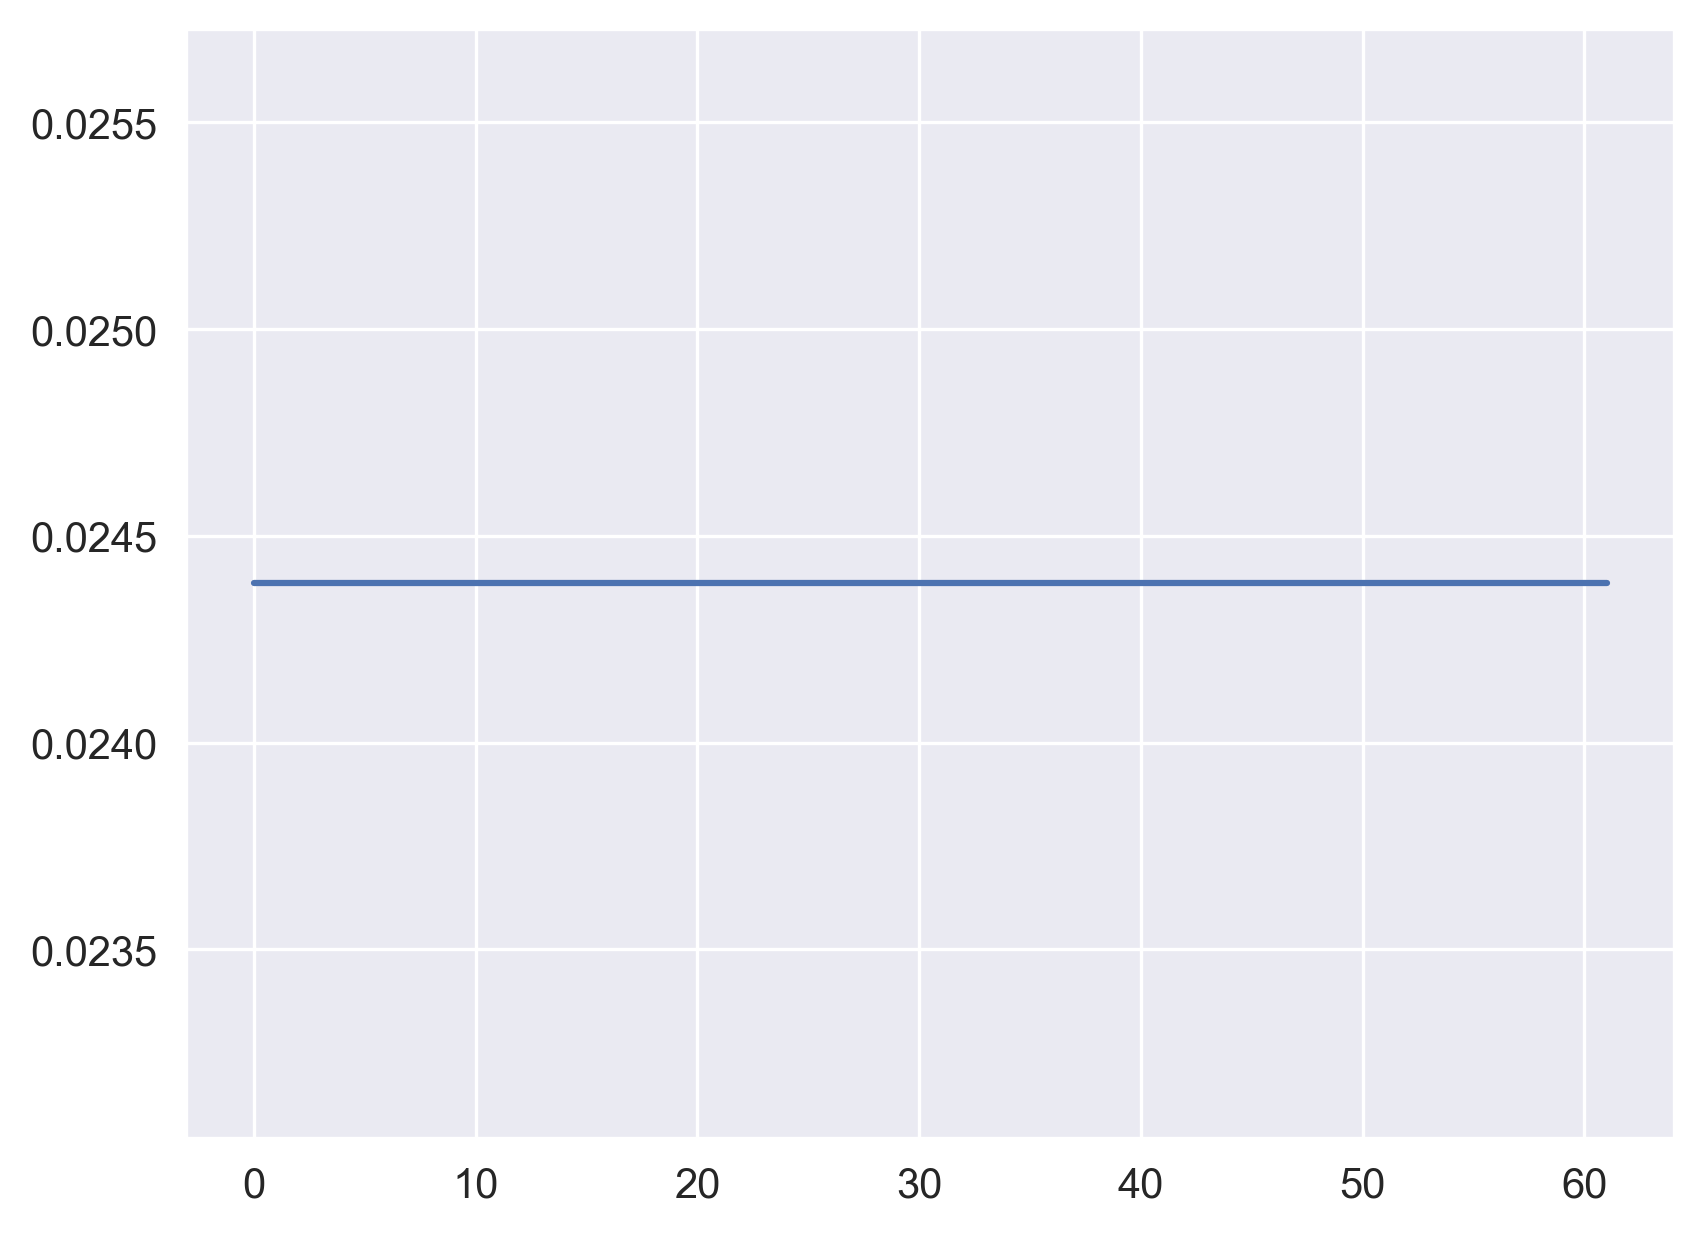

In [51]:
plt.plot(mod)

In [36]:
print(test.modularity)

0.15588783681640062


In [10]:
test.membership

[0,
 1,
 2,
 2,
 0,
 1,
 1,
 3,
 4,
 2,
 0,
 1,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 1,
 1,
 5,
 0,
 6,
 1,
 0,
 1,
 2,
 2,
 1,
 2,
 7,
 7,
 1,
 8,
 2,
 0,
 1,
 0,
 4,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 9,
 2,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 3,
 2,
 2,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 1,
 1,
 1,
 4,
 0,
 0,
 10,
 0,
 0,
 1,
 1,
 0]

In [103]:
ig.drawing.plot(test.graph)

(array([   9.,   30.,   37.,   34.,   39.,   77.,   78.,  143.,  182.,
         217.,  305.,  422.,  602.,  691.,  941., 1194., 1483., 1620.,
        1694., 1226.]),
 array([-0.92857143, -0.83214286, -0.73571429, -0.63928571, -0.54285714,
        -0.44642857, -0.35      , -0.25357143, -0.15714286, -0.06071429,
         0.03571429,  0.13214286,  0.22857143,  0.325     ,  0.42142857,
         0.51785714,  0.61428571,  0.71071429,  0.80714286,  0.90357143,
         1.        ]),
 <BarContainer object of 20 artists>)

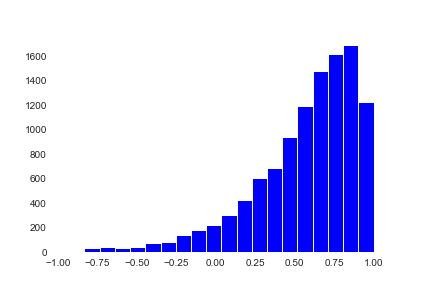

In [80]:
hist = plt.figure()
plt.hist(rvals1_small[np.tril_indices(147, k=1)], bins=20, color='blue')

In [108]:
from sklearn.preprocessing import StandardScaler
reducer = umap.UMAP(n_neighbors=7)

In [ ]:
# data = StandardScaler().fit_transform(np.vstack((rvals1, rvals1_small, control_rvals, control_rvals_small, rvals2)))
# data = StandardScaler().fit_transform(np.vstack((per2, per1, per1_small, control_per, control_per_small)))
data = StandardScaler().fit_transform(rvals1_small)
embedding = reducer.fit_transform(data)


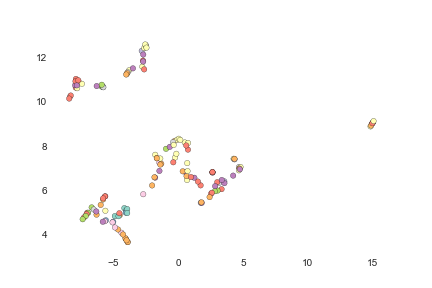

In [112]:
umap_plot_1, u_ax_1 = plt.subplots()
u_ax_1.scatter(embedding[:,0], embedding[:,1], c=my_allen_colors, s=30, linewidths=0.25, edgecolors='black')

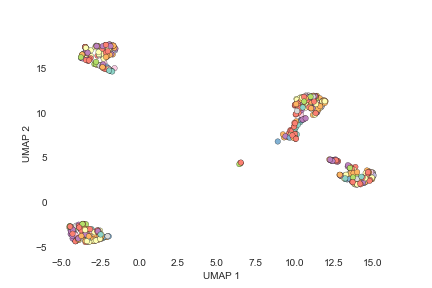

In [91]:
import seaborn as sns
%matplotlib widget
color_ind=np.zeros(147*4)
color_ind[0:146]=0
color_ind[147:147*2]=1
color_ind[147*2:147*3]=2
color_ind[147*3:147*4]=3
color_ind[147*4:147*5]=4
col_pal = [sns.color_palette()[int(i)] for i in color_ind]

indiv_col = np.unique(my_allen_colors)

umap_plot, u_ax = plt.subplots()
u_ax.scatter(embedding[:147,0], embedding[:147,1], c=my_allen_colors, s=30, linewidths=0.25, edgecolors='black')
u_ax.scatter(embedding[147:147*2,0], embedding[147:147*2,1],c=my_allen_colors,s=30, linewidths=0.25, edgecolors='black')
u_ax.scatter(embedding[147*2:147*3,0], embedding[147*2:147*3,1],c=my_allen_colors,s=30, linewidths=0.25, edgecolors='black')
u_ax.scatter(embedding[147*3:147*4,0], embedding[147*3:147*4,1],c=my_allen_colors,s=30,linewidths=0.25, edgecolors='black')
# u_ax.scatter(embedding[147*4:147*5,0], embedding[147*4:147*5,1],c='#C9877E',s=30,linewidths=0.25, edgecolors='black')
# u_ax.legend(['LB ChR2', 'SB ChR2', 'LB Control', 'SB Control'])
u_ax.set_xlabel('UMAP 1')
u_ax.set_ylabel('UMAP 2')

umap_plot.savefig('UMAP_region.svg')

In [24]:
np.array(my_allen_colors)

array([[0.85098039, 0.85098039, 0.85098039],
       [1.        , 1.        , 0.70196078],
       [0.85098039, 0.85098039, 0.85098039],
       [0.98431373, 0.50196078, 0.44705882],
       [1.        , 1.        , 0.70196078],
       [0.99215686, 0.70588235, 0.38431373],
       [1.        , 1.        , 0.70196078],
       [0.98431373, 0.50196078, 0.44705882],
       [0.98431373, 0.50196078, 0.44705882],
       [0.70196078, 0.87058824, 0.41176471],
       [0.74509804, 0.72941176, 0.85490196],
       [0.74509804, 0.72941176, 0.85490196],
       [0.70196078, 0.87058824, 0.41176471],
       [1.        , 1.        , 0.70196078],
       [1.        , 1.        , 0.70196078],
       [1.        , 1.        , 0.70196078],
       [0.74509804, 0.72941176, 0.85490196],
       [0.7372549 , 0.50196078, 0.74117647],
       [0.74509804, 0.72941176, 0.85490196],
       [0.99215686, 0.70588235, 0.38431373],
       [0.7372549 , 0.50196078, 0.74117647],
       [0.85098039, 0.85098039, 0.85098039],
       [0.

In [92]:
nx.triangles(chr2_G)

{'AAA': 985,
 'ACA': 1022,
 'ACB': 523,
 'AHN': 0,
 'AI': 1508,
 'AT': 202,
 'AUD': 58,
 'AVP': 0,
 'AVPV': 1,
 'BAC': 790,
 'BLA': 1543,
 'BMA': 488,
 'BST': 590,
 'CA1': 262,
 'CA2': 453,
 'CA3': 991,
 'CEA': 985,
 'CL': 1175,
 'CLA': 1508,
 'CLI': 102,
 'CM': 1143,
 'CP': 1543,
 'CS': 50,
 'CUN': 47,
 'DG': 1426,
 'DMH': 838,
 'DN': 406,
 'DR': 222,
 'ECT': 1149,
 'ENT': 201,
 'EP': 1605,
 'EW': 0,
 'FC': 38,
 'FN': 126,
 'FS': 848,
 'GPe': 977,
 'GPi': 727,
 'GU': 272,
 'HEM': 24,
 'IA': 635,
 'IC': 0,
 'IF': 35,
 'IG': 560,
 'ILA': 1386,
 'IP': 32,
 'IPN': 728,
 'LA': 184,
 'LC': 0,
 'LD': 1112,
 'LH': 209,
 'LHA': 1069,
 'LPO': 102,
 'LS': 1103,
 'MA': 635,
 'MA3': 201,
 'MBO': 816,
 'MD': 869,
 'ME': 0,
 'MEA': 985,
 'MEPO': 0,
 'MEV': 0,
 'MH': 1543,
 'MO': 565,
 'MPN': 4,
 'MPO': 4,
 'MRN': 246,
 'MS': 77,
 'MY-mot': 0,
 'MY-sat': 0,
 'MY-sen': 0,
 'NB': 0,
 'NDB': 3,
 'OLF': 998,
 'ORB': 1010,
 'OT': 1529,
 'OV': 1,
 'P-mot': 681,
 'P-sat': 290,
 'P-sen': 1240,
 'PA': 181,
 '

In [61]:
net.Similarity(np.abs(nx.adj_matrix(chr2_G_small)), np.abs(nx.adj_matrix(ir_G)))

C:\Users\Ryan Senne\AppData\Local\Temp\ipykernel_24784\2224518187.py:1: DeprecationWarning: adj_matrix is deprecated and will be removed in version 3.0.
Use `adjacency_matrix` instead

  net.Similarity(np.abs(nx.adj_matrix(chr2_G_small).toarray()), np.abs(nx.adj_matrix(ir_G).toarray()))
C:\Users\Ryan Senne\anaconda3\envs\network_analysis\lib\site-packages\networkx\linalg\graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [58]:
nx.adj_matrix(ir_G).toarray()

C:\Users\Ryan Senne\AppData\Local\Temp\ipykernel_24784\3511249466.py:1: DeprecationWarning: adj_matrix is deprecated and will be removed in version 3.0.
Use `adjacency_matrix` instead

  nx.adj_matrix(ir_G).toarray()
C:\Users\Ryan Senne\anaconda3\envs\network_analysis\lib\site-packages\networkx\linalg\graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


array([[ 0.        ,  0.61538462,  0.51748252, ...,  0.29370629,
         0.2175452 ,  0.72027972],
       [ 0.61538462,  0.        ,  0.57342657, ...,  0.33566434,
        -0.07719346,  0.62237762],
       [ 0.51748252,  0.57342657,  0.        , ..., -0.07692308,
         0.45614316,  0.79020979],
       ...,
       [ 0.29370629,  0.33566434, -0.07692308, ...,  0.        ,
        -0.18245726,  0.13986014],
       [ 0.2175452 , -0.07719346,  0.45614316, ..., -0.18245726,
         0.        ,  0.4877223 ],
       [ 0.72027972,  0.62237762,  0.79020979, ...,  0.13986014,
         0.4877223 ,  0.        ]])

In [ ]:
nx.jaccard_coefficient()

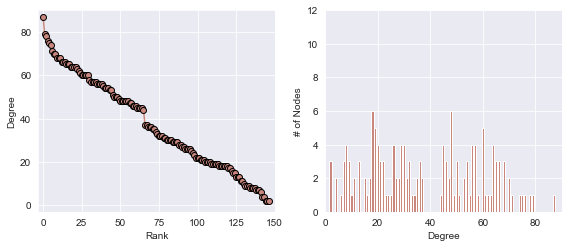

In [90]:
degree_sequence = sorted((d for n, d in ir_G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)


ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.set_xlim(-3, 150)
ax1.set_ylim(-3, 90)
ax1.plot(degree_sequence, color='#C9877E',marker="o")
# ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.set_xlim(0, 90)
ax2.set_ylim(0, 12)
ax2.bar(*np.unique(degree_sequence, return_counts=True), color='#C9877E')
# ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

fig.savefig(r"C:\Users\Ryan Senne\Desktop\Figures\ir_G_degree_plots.svg")

(array([137, 138, 139, 140, 141, 142, 143, 144, 145, 146]),
 array([ 1,  1,  1,  1,  2,  4, 19, 21, 49, 48], dtype=int64))

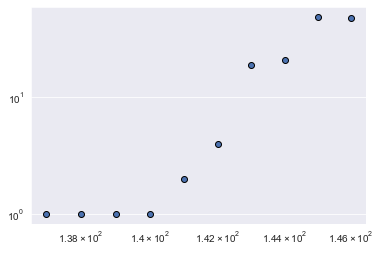

In [60]:
plt.figure()
plt.loglog(*np.unique(degree_sequence, return_counts=True), marker='o', linestyle='')
np.unique(degree_sequence, return_counts=True)

In [13]:
control_lb_data, control_lb_nodes = net.loadData(control_lb)
control_rvals, p = net.corrMatrix(control_lb_data, corr_type='Spearman', z_trans=False)
threshold_matrix = net.significanceCheck(p, control_rvals, 1, names=control_nodes, include_Negs=True)
control_per = net.percentile(threshold_matrix, 0.25)
control_lb_G = net.networx(control_per, control_nodes)

# chr2_lb_data, chr2_lb_nodes = net.loadData(chr2_lb)
# rvals1, p1 = net.corrMatrix(chr2_lb_data, corr_type='Spearman', z_trans=False)
# threshold_matrix1 = net.significanceCheck(p1, rvals1, 1, names=chr2_lb_nodes, include_Negs=True)
# per1 = net.percentile(threshold_matrix1, 0.25)
# chr2_lb_G = net.networx(per1, chr2_nodes)

In [65]:
ps = pd.read_csv(r'C:\Users\Ryan Senne\Downloads\SB_ROIs.csv')

In [66]:
ps

Unnamed: 0 Discovery?  P value  Mean of ChR2  Mean of Control  Difference  \
0          DG         No   0.0141          3333             1700      1633.0   
1         CA3         No   0.0199          3443             1596      1847.0   
2         CA1         No   0.0210          6709             2924      3784.0   
3          LH         No   0.0173          3994             1719      2275.0   
4          MH         No   0.6189          1926             1591       334.6   
5         PVT         No   0.0465         11962             7551      4412.0   
6         BLA         No   0.0303          6201             3314      2887.0   
7         CEA         No   0.2114          2909             1952       956.6   
8         PAG         No   0.0589          3343             2820       523.5   
9         DMH         No   0.5016         12084            10027      2057.0   
10        VMH         No   0.0047          7044             1607      5438.0   
11        LHA         No   0.1666          3578             2441      1137.0   

    SE of difference  t ratio      df  q value  
0              546.5   2.9870   9.718   0.0503  
1              664.5   2.7790   9.744   0.0503  
2             1341.0   2.8220   8.558   0.0503  
3              777.5   2.9260   8.806   0.0503  
4              656.8   0.5094  13.160   0.6189  
5             1925.0   2.2920   9.383   0.0797  
6             1181.0   2.4450  12.370   0.0607  
7              711.2   1.3450   9.035   0.2537  
8              247.4   2.1160  10.590   0.0883  
9             2932.0   0.7017   8.507   0.5472  
10            1345.0   4.0430   7.184   0.0503  
11             759.5   1.4970   9.624   0.2221

In [67]:
p_vals = ps['P value'].sort_values(ignore_index=True)

In [16]:
import networkx as nx
import numpy as np

def persistent_homology_0D(graph):
    """
    Compute 0-dimensional persistent homology of the given graph.

    Parameters
    ----------
    graph : NetworkX graph
        The graph to compute persistent homology on.

    Returns
    -------
    List of tuples (birth, death) representing the birth and death times of each homology class.
    """

    # Create a list of all nodes in the graph
    nodes = list(graph.nodes())

    # Create a list to store birth times of each node
    birth_times = [0] * len(nodes)

    # Compute the birth time of each node
    for i in range(len(nodes)):
        # Get the neighbors of the node
        neighbors = list(graph.neighbors(nodes[i]))

        # Compute the birth time of the node as the maximum birth time of its neighbors + 1
        max_birth_time = max([birth_times[nodes.index(neighbor)] for neighbor in neighbors], default=0)
        birth_times[i] = max_birth_time + 1

    # Create a list to store homology classes
    homology_classes = []

    # Compute the death time of each homology class
    for i in range(len(nodes)):
        # If the birth time of the node is 0, skip it
        if birth_times[i] == 0:
            continue

        # Find the minimum birth time of the neighbors of the node
        neighbors = list(graph.neighbors(nodes[i]))
        min_birth_time = min([birth_times[nodes.index(neighbor)] for neighbor in neighbors], default=float('inf'))

        # If the minimum birth time is infinity, the homology class is infinite
        if min_birth_time == float('inf'):
            homology_classes.append((birth_times[i], float('inf')))
        # Otherwise, the homology class has a finite death time
        else:
            homology_classes.append((birth_times[i], min_birth_time))

    # If there are no homology classes, add the trivial class
    if not homology_classes:
        homology_classes.append((0, float('inf')))

    return homology_classes

In [17]:
homo_classes = persistent_homology_0D(chr2_G)

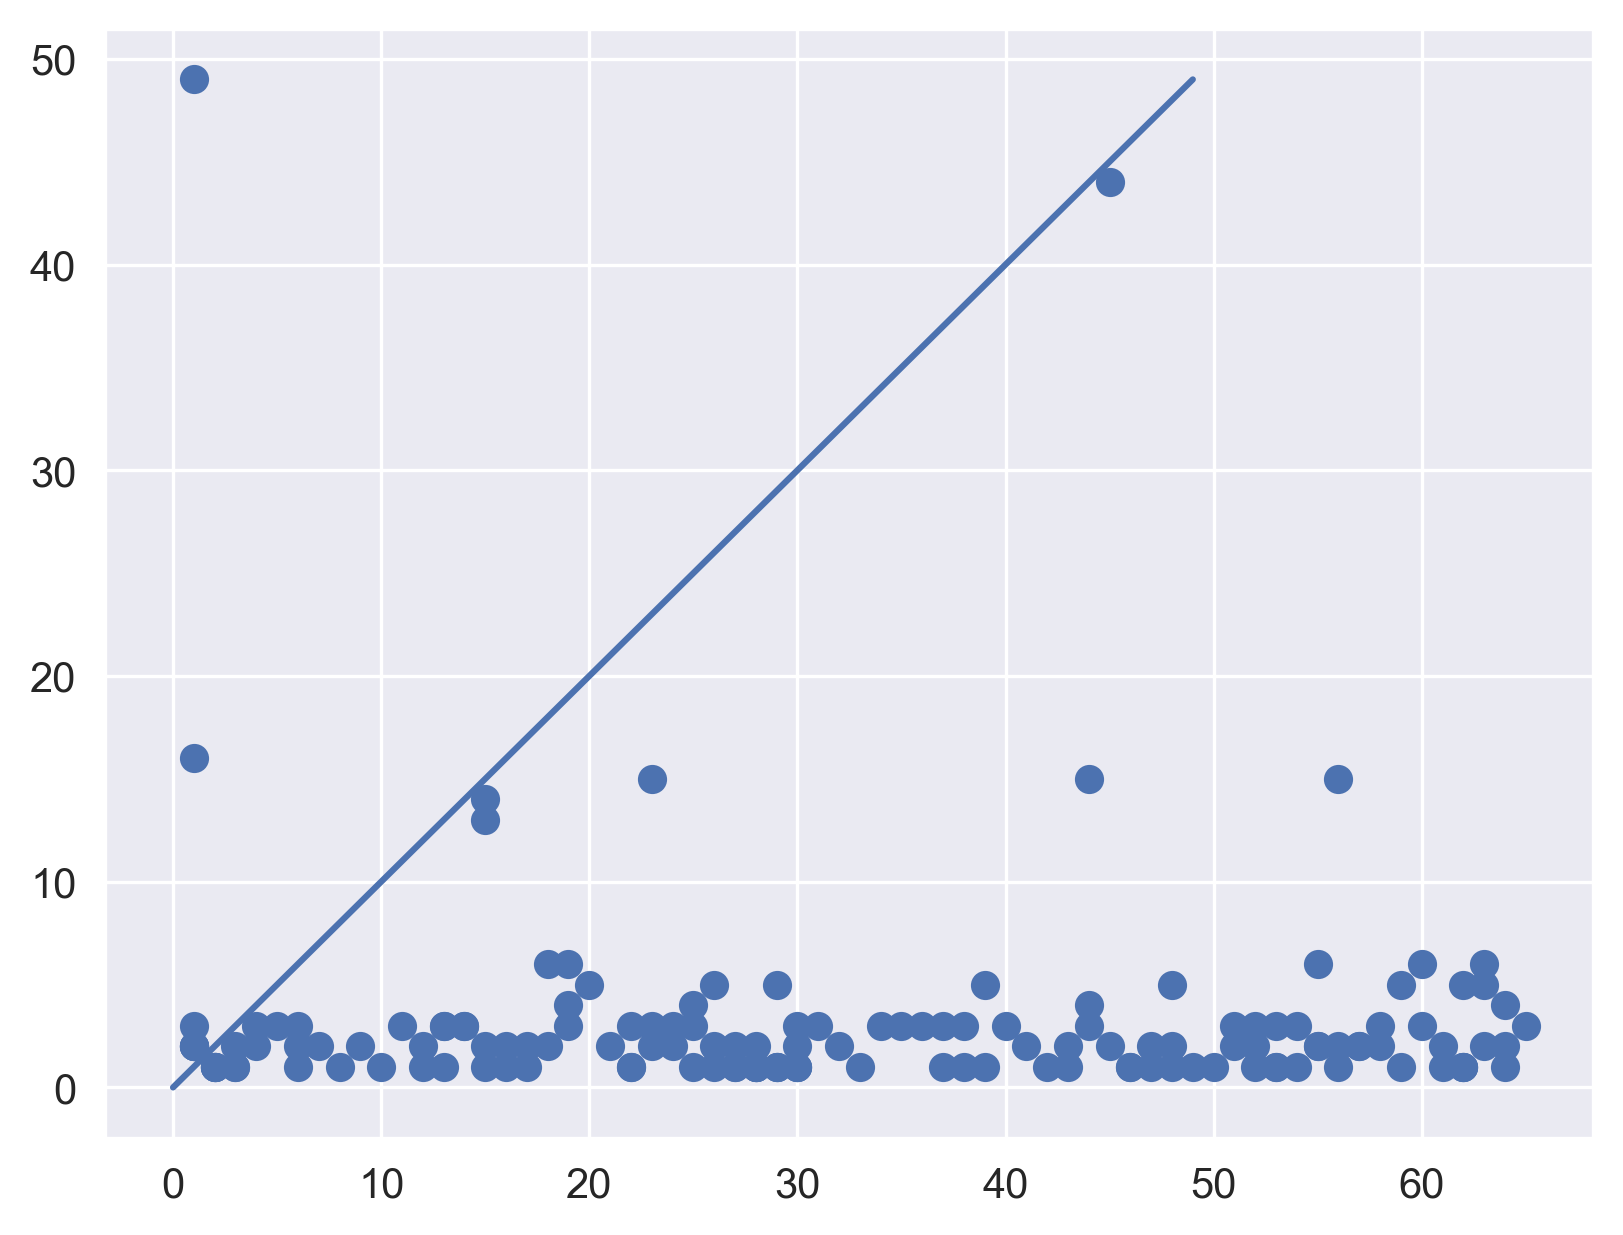

In [20]:

# plt.scatter(homo_classes[0])
x_coords = [p[0] for p in homo_classes]
y_coords = [p[1] for p in homo_classes]

plt.scatter(x_coords, y_coords)
plt.plot(range(0,50), range(0,50))


C:\Users\ryansenne\anaconda3\envs\network\lib\site-packages\ripser\ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(


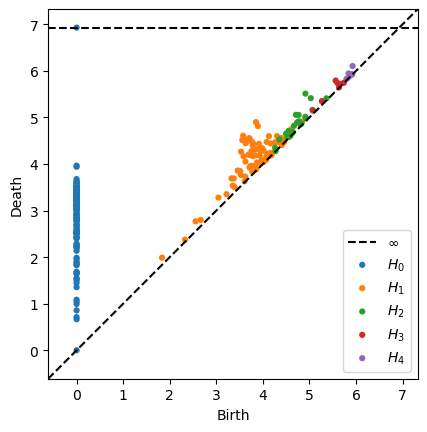

In [36]:
from ripser import ripser
from persim import plot_diagrams

dgms = ripser(nx.to_numpy_array(chr2_G), maxdim=4)['dgms']
plot_diagrams(dgms, show=True)

In [24]:
dir(ir_G)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes',
 'number_of_edges',
 'number_of_nodes',
 'order',
 'remove_edg

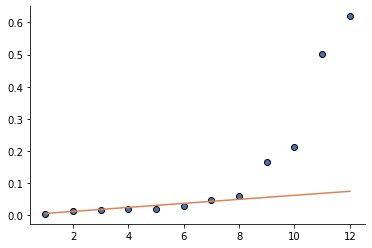

In [72]:
plt.plot(np.arange(1, 13), p_vals, marker='o',linestyle='')
plt.plot(np.arange(1, 13), z(np.arange(1,13)))

(array([4., 2., 1., 1., 0., 0., 0., 0., 0., 1.]),
 array([0.0047 , 0.02089, 0.03708, 0.05327, 0.06946, 0.08565, 0.10184,
        0.11803, 0.13422, 0.15041, 0.1666 ]),
 <BarContainer object of 10 artists>)

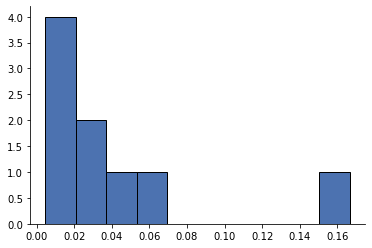

In [49]:
plt.hist(p_vals[:9])

In [9]:
control_df, control_mc_clusters, control_cluster_vector_mc, control_node_community_dict = net.markov(control_G, control_nodes)

chr2_df, chr2_mc_clusters, chr2_cluster_vector_mc, chr2_node_community_dict = net.markov(chr2_G, chr2_nodes)

In [19]:
control_max_mod_lou_comm, control_lou_max_mod, control_lou_mod_mean, control_cluster_vector_lou = net.louvain(control_G, control_nodes, 100)

chr2_max_mod_lou_comm, chr2_lou_max_mod, chr2_lou_mod_mean, chr2_cluster_vector_lou = net.louvain(chr2_G, chr2_nodes, 100)

# ir_max_mod_lou_comm, ir_lou_max_mod, ir_lou_mod_mean, ir_cluster_vector_lou = net.louvain(ir_G, ir_nodes, 100)

In [20]:
control_max_mod_lou_comm

[(64,
  66,
  3,
  132,
  6,
  7,
  71,
  137,
  8,
  9,
  12,
  138,
  76,
  143,
  75,
  141,
  19,
  85,
  92,
  34,
  99,
  100,
  37,
  103,
  104,
  107,
  108,
  51,
  116,
  117,
  59,
  63),
 (26,),
 (57,),
 (130,
  131,
  133,
  136,
  10,
  11,
  16,
  17,
  25,
  29,
  31,
  33,
  38,
  39,
  41,
  44,
  46,
  49,
  50,
  53,
  54,
  55,
  58,
  60,
  65,
  67,
  68,
  69,
  70,
  79,
  80,
  81,
  86,
  88,
  90,
  91,
  93,
  94,
  96,
  97,
  98,
  102,
  106,
  110,
  112,
  113,
  118,
  119,
  126,
  127),
 (0,
  5,
  134,
  135,
  139,
  140,
  13,
  14,
  15,
  144,
  142,
  84,
  87,
  24,
  23,
  28,
  95,
  32,
  35,
  40,
  42,
  45,
  48,
  56),
 (83, 115),
 (128,
  129,
  1,
  2,
  4,
  18,
  146,
  20,
  21,
  22,
  27,
  30,
  36,
  43,
  47,
  52,
  61,
  62,
  72,
  73,
  74,
  77,
  78,
  82,
  89,
  101,
  105,
  109,
  111,
  114,
  120,
  121,
  122,
  123,
  124,
  125),
 (145,)]

In [12]:
control_lb_max_mod_lou_comm, control_lb_lou_max_mod, control_lb_lou_mod_mean, control_lb_cluster_vector_lou = net.louvain(control_G, control_nodes, 100)

In [6]:
allen_reg = pd.read_csv(r'C:\Users\Ryan Senne\PycharmProjects\network_analysis\csv_files\ROIs.csv')['Allen Area']

control_df_clust_cuts, control_modularities, control_clust_assigns, control_, control_clust_vector_hc = net.hierarch_clust(control_G, control_nodes, allen_reg)

chr2_df_clust_cuts, chr2_modularities, chr2_clust_assigns, chr2_, chr2_clust_vector_hc = net.hierarch_clust(chr2_G, chr2_nodes, allen_reg)

C:\Users\Ryan Senne\anaconda3\envs\network_analysis\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\Ryan Senne\anaconda3\envs\network_analysis\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\Ryan Senne\anaconda3\envs\network_analysis\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\Ryan Senne\anaconda3\envs\network_analysis\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWar

In [26]:
hc_control_clust = [[control_nodes[i] for i in j] for j in control_]
hc_chr2_cluster = [[chr2_nodes[i] for i in j] for j in chr2_]

In [13]:
control_clust = [[control_nodes[i] for i in j] for j in control_max_mod_lou_comm]
chr2_cluster = [[chr2_nodes[i] for i in j] for j in chr2_max_mod_lou_comm]

In [9]:
ir_cluster = [[ir_nodes[i] for i in j] for j in ir_max_mod_lou_comm]

In [15]:
control_lb_clust = [[control_lb_nodes[i] for i in j] for j in control_lb_max_mod_lou_comm]
# chr2_cluster = [[chr2_nodes[i] for i in j] for j in chr2_max_mod_lou_comm]

In [16]:
nx.algorithms.community.modularity(control_lb_G, control_lb_clust)

0.18835442941396024

In [14]:
nx.algorithms.community.modularity(chr2_G, chr2_cluster)

0.19687011965803297

In [10]:
nx.algorithms.community.modularity(ir_G, ir_cluster)

0.2822260564309944

In [62]:
random.shuffle(chr2_max_mod_lou_comm)
cont_pos_dict = net.get_position_data(control_max_mod_lou_comm, control_nodes, False)
chr2_pos_dict = net.get_position_data(chr2_max_mod_lou_comm, chr2_nodes, False)

my_allen_colors = net.get_allen_colors(r'C:\Users\Ryan Senne\PycharmProjects\network_analysis\csv_files\ROIs.csv')


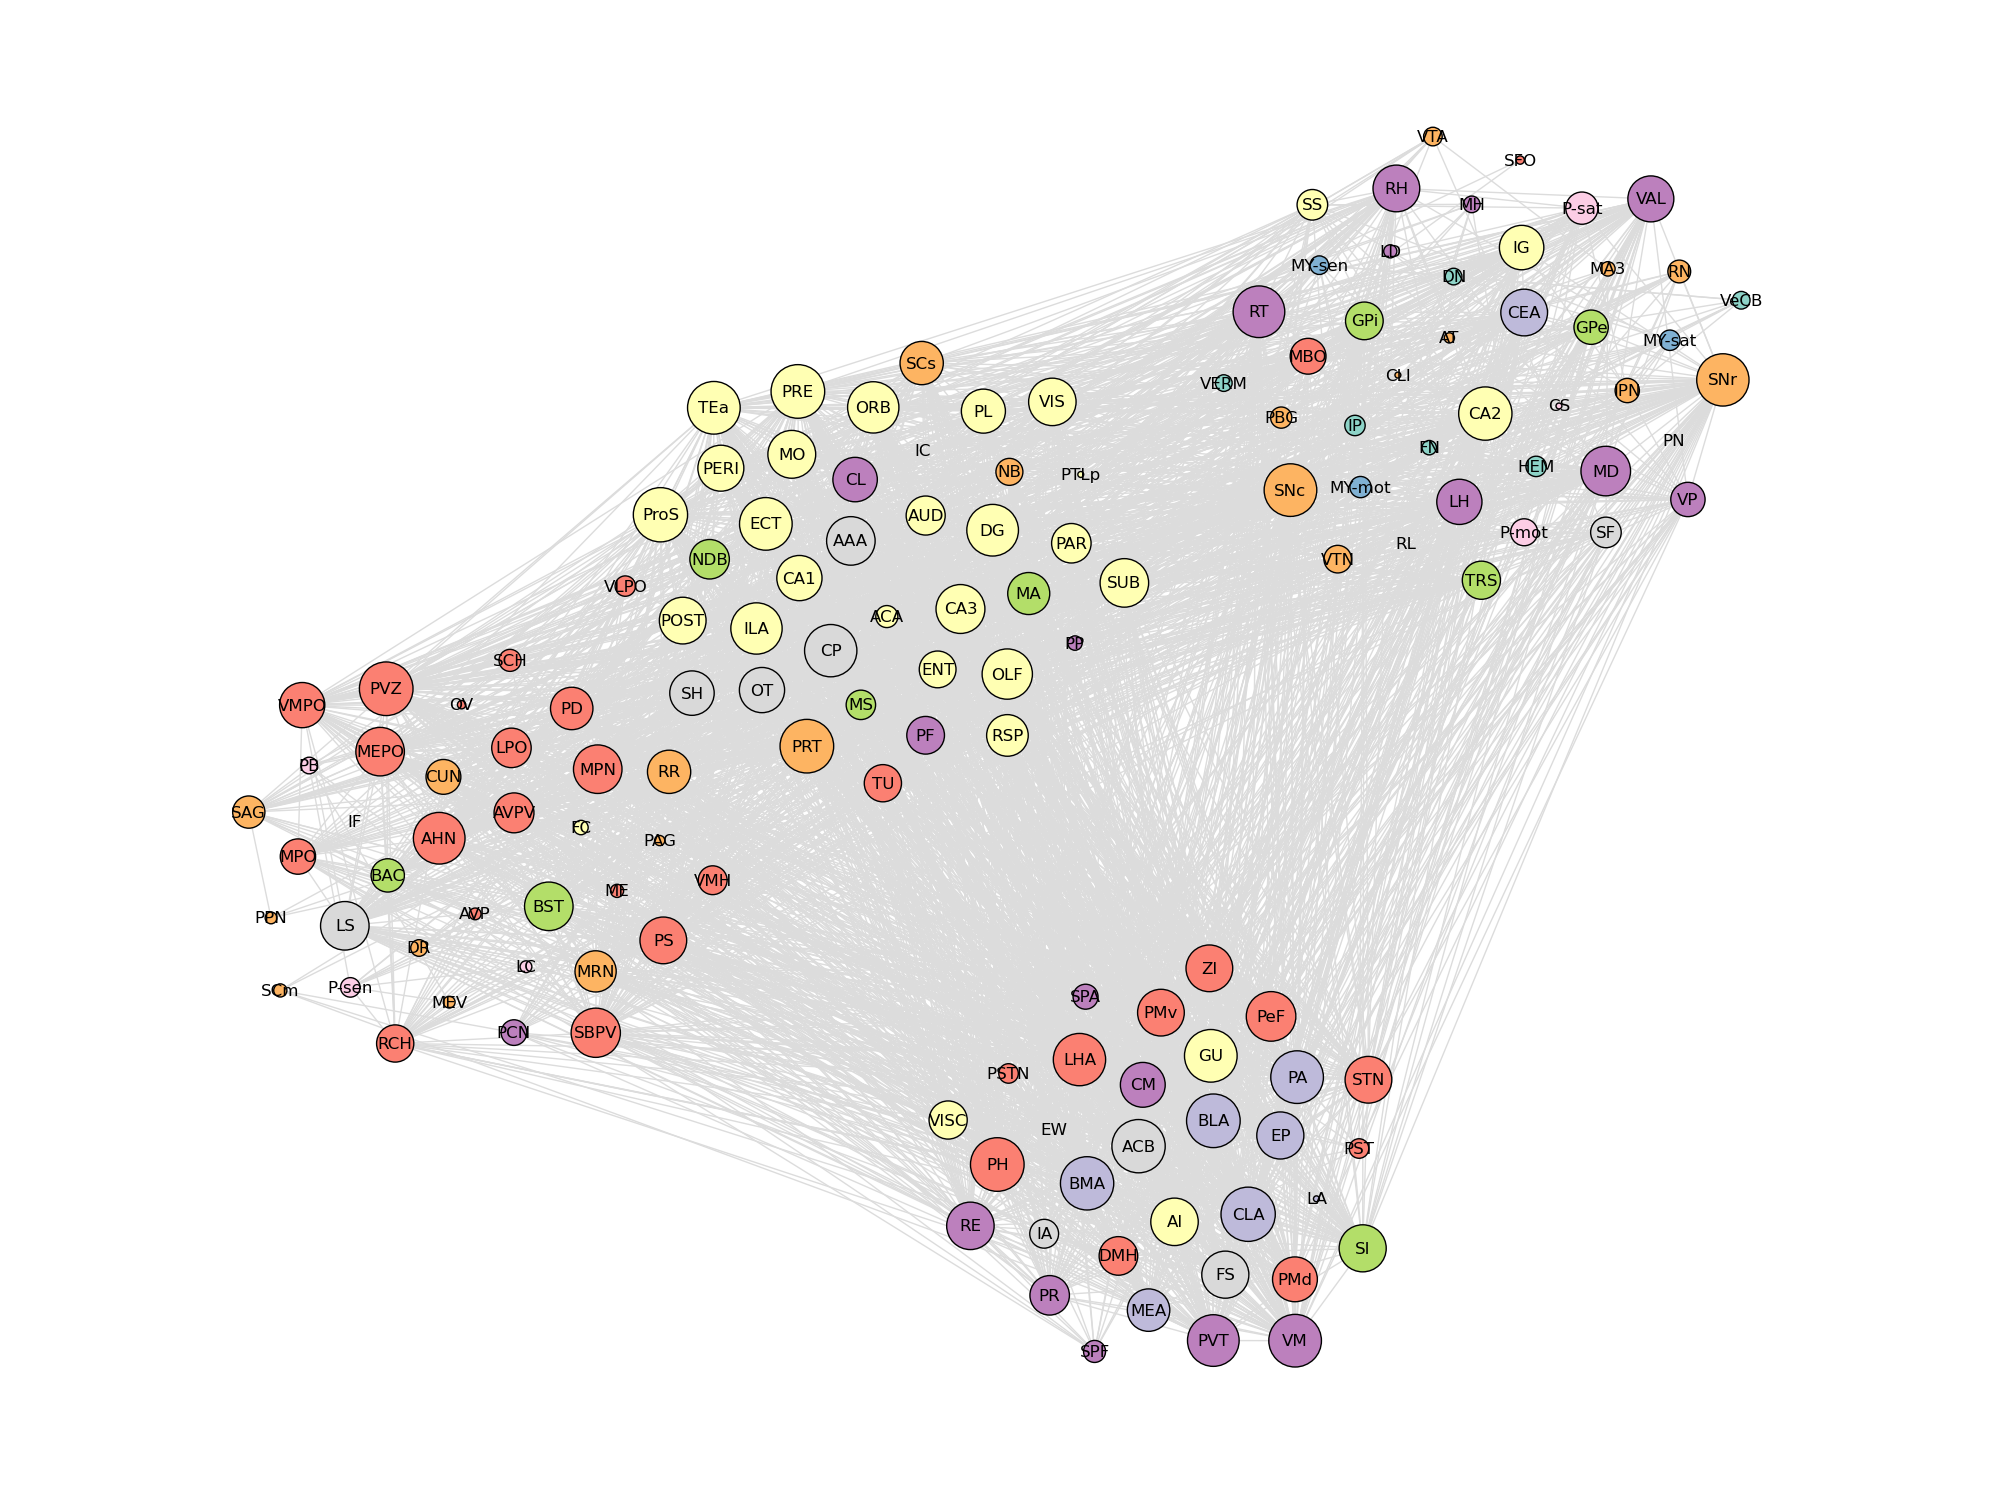

In [38]:
chr2_G = r.to_networkx()
# comm = [(i, j) for i,j in enumerate(test.membership)]
#
# grouped_indices = {value: [i for i, x in enumerate(test.membership) if x == value] for value in set(test.membership)}
# list_tuples = [tuple(indices) for indices in grouped_indices.values()]
import pickle
with open(r"C:\Users\ryansenne\Downloads\test (3)", "rb") as fp:   # Unpickling
    b = pickle.load(fp)
random.shuffle(b)
# Print the result
my_allen_colors = net.get_allen_colors(r'C:\Users\ryansenne\PycharmProjects\network_analysis\csv_files\ROIs.csv')
chr2_pos_dict = net.get_position_data(b, chr2_nodes, False)
ir_graph = net.graph_network(chr2_G_small, my_allen_colors, chr2_pos_dict)


In [39]:
ir_graph.savefig('ir_G.svg')

In [23]:
grouped_indices = {value: [i for i, x in enumerate(test.membership) if x == value] for value in set(test.membership)}
list_tuples = [tuple(indices) for indices in grouped_indices.values()]

In [40]:
!pip install mantel

In [12]:
chr2_G.nodes()

NodeView(('AAA', 'ACA', 'ACB', 'AHN', 'AI', 'AT', 'AUD', 'AVP', 'AVPV', 'BAC', 'BLA', 'BMA', 'BST', 'CA1', 'CA2', 'CA3', 'CEA', 'CL', 'CLA', 'CLI', 'CM', 'CP', 'CS', 'CUN', 'DG', 'DMH', 'DN', 'DR', 'ECT', 'ENT', 'EP', 'EW', 'FC', 'FN', 'FS', 'GPe', 'GPi', 'GU', 'HEM', 'IA', 'IC', 'IF', 'IG', 'ILA', 'IP', 'IPN', 'LA', 'LC', 'LD', 'LH', 'LHA', 'LPO', 'LS', 'MA', 'MA3', 'MBO', 'MD', 'ME', 'MEA', 'MEPO', 'MEV', 'MH', 'MO', 'MPN', 'MPO', 'MRN', 'MS', 'MY-mot', 'MY-sat', 'MY-sen', 'NB', 'NDB', 'OLF', 'ORB', 'OT', 'OV', 'P-mot', 'P-sat', 'P-sen', 'PA', 'PAG', 'PAR', 'PB', 'PBG', 'PCN', 'PD', 'PERI', 'PF', 'PH', 'PL', 'PMd', 'PMv', 'PN', 'POST', 'PP', 'PPN', 'PR', 'PRE', 'PRT', 'PS', 'PST', 'PSTN', 'PTLp', 'PVT', 'PVZ', 'PeF', 'ProS', 'RCH', 'RE', 'RH', 'RL', 'RN', 'RR', 'RSP', 'RT', 'SAG', 'SBPV', 'SCH', 'SCm', 'SCs', 'SF', 'SFO', 'SH', 'SI', 'SNc', 'SNr', 'SPA', 'SPF', 'SS', 'STN', 'SUB', 'TEa', 'TRS', 'TU', 'VAL', 'VERM', 'VIS', 'VISC', 'VLPO', 'VM', 'VMH', 'VMPO', 'VP', 'VTA', 'VTN', 'VeCB

In [16]:


random.shuffle(chr2_max_mod_lou_comm)
cont_pos_dict = net.get_position_data(control_max_mod_lou_comm, control_nodes, False)
chr2_pos_dict = net.get_position_data(chr2_max_mod_lou_comm, chr2_nodes, False)

my_allen_colors = net.get_allen_colors(r'C:\Users\Ryan Senne\PycharmProjects\network_analysis\csv_files\ROIs.csv')

In [25]:
random.shuffle(chr2_max_mod_lou_comm)
ir_pos_dict = net.get_position_data(chr2_max_mod_lou_comm, chr2_nodes, False)
my_allen_colors = net.get_allen_colors(r'C:\Users\Ryan Senne\PycharmProjects\network_analysis\csv_files\ROIs.csv')

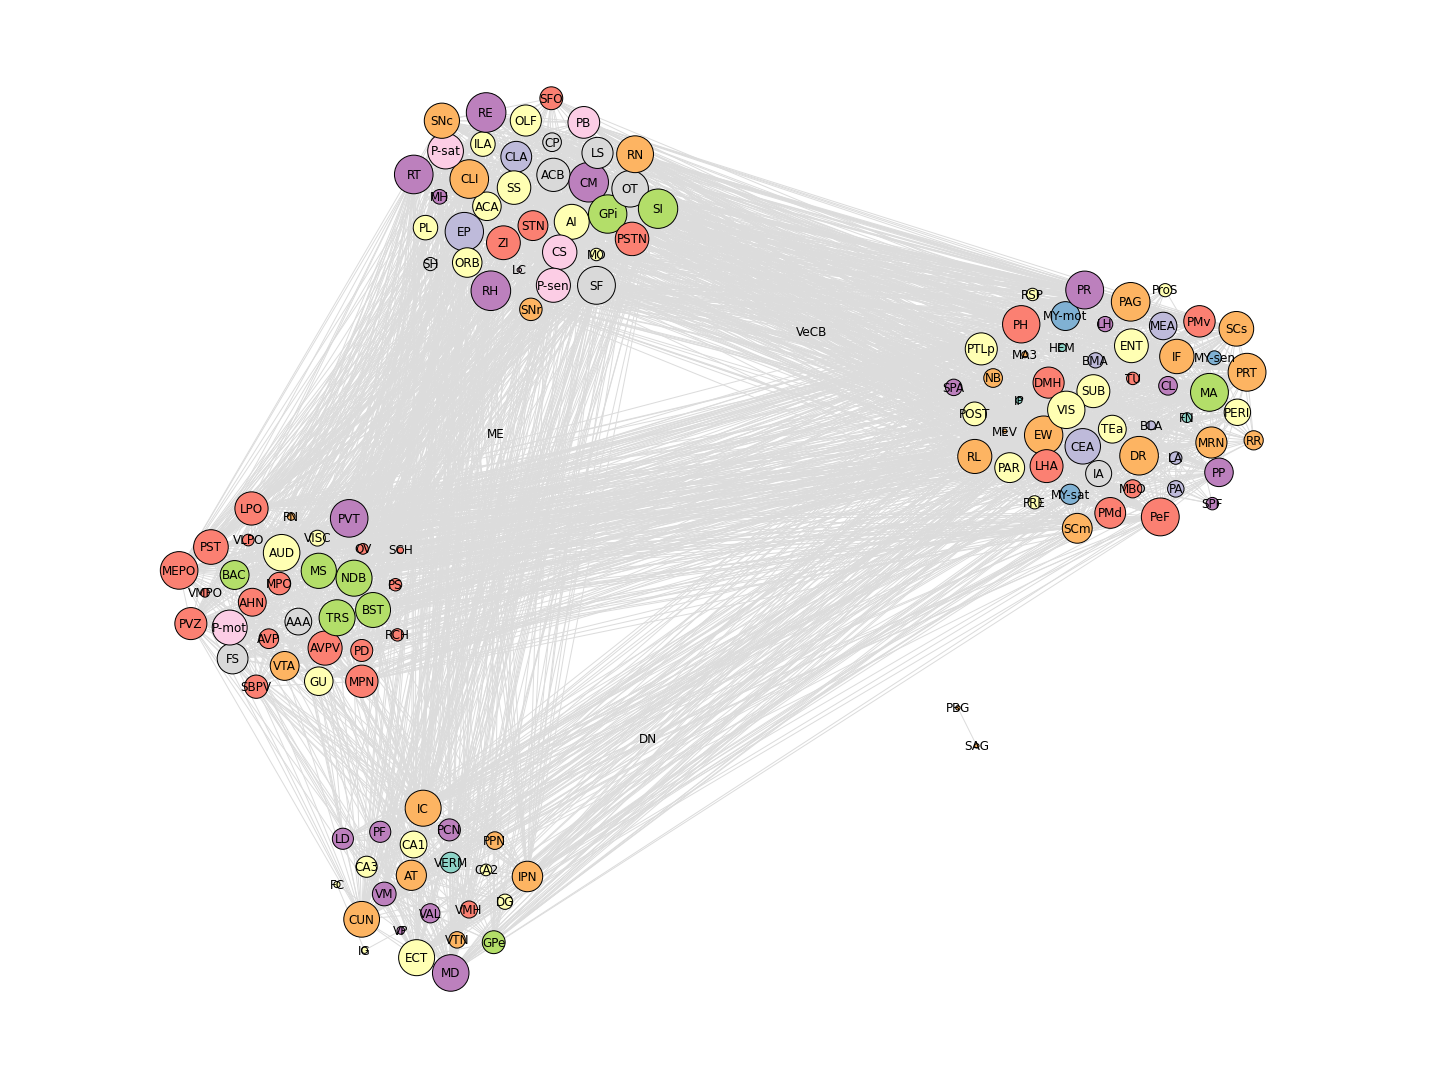

In [17]:
ir_graph = net.graph_network(control_G, my_allen_colors, control_lb_pos_dict)

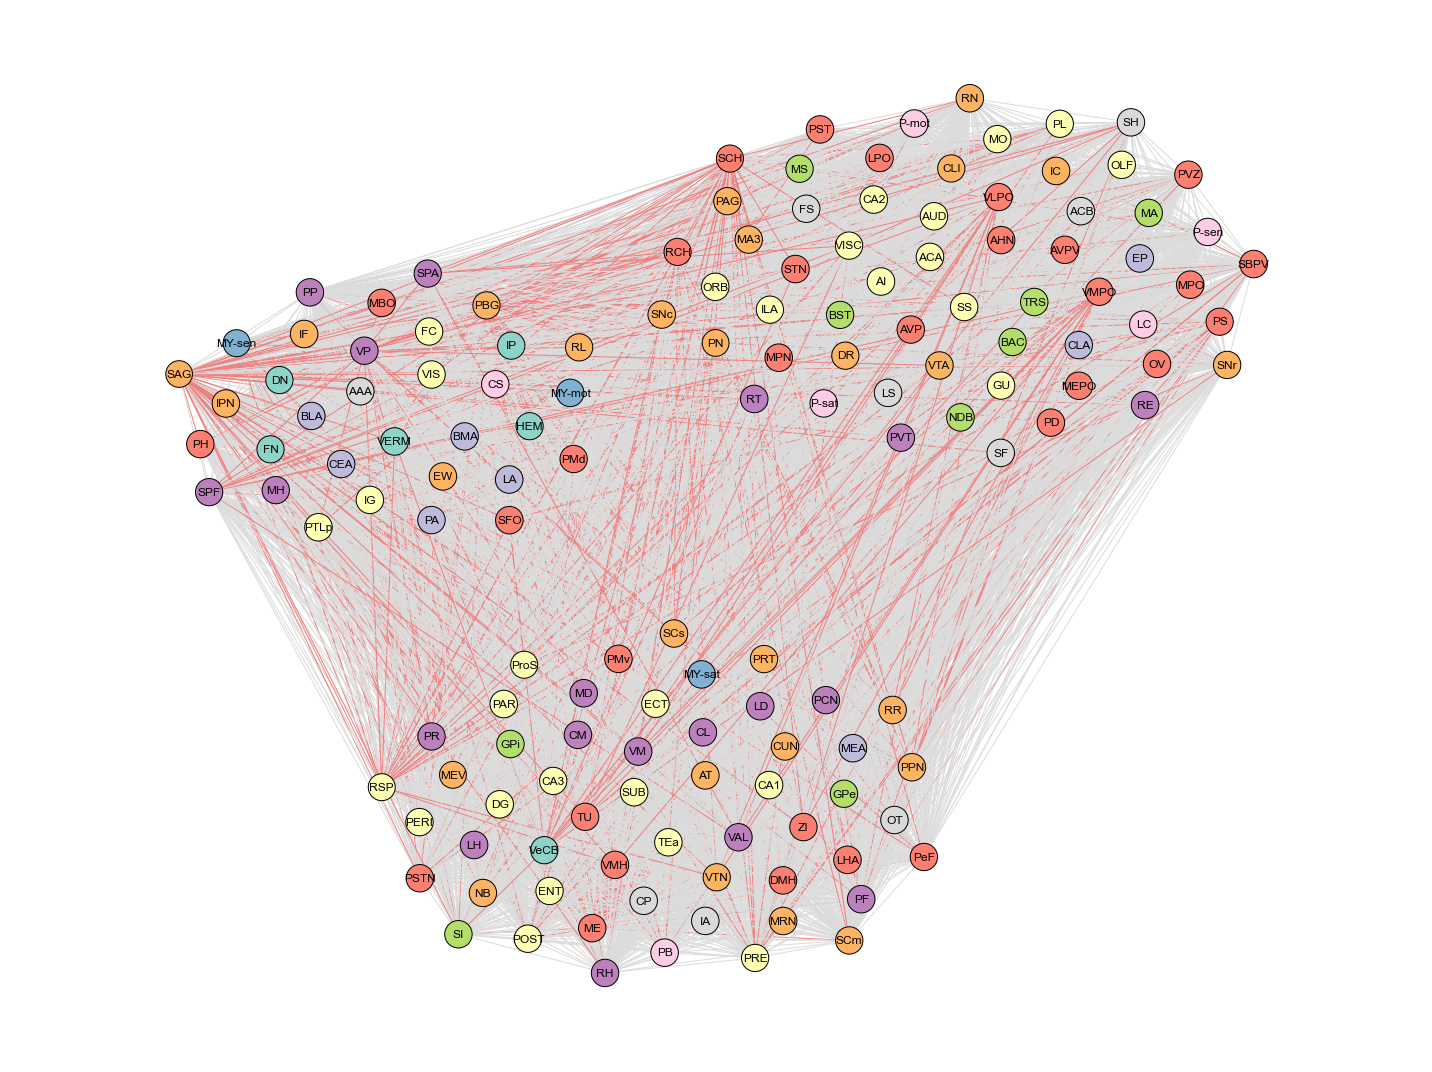

In [63]:
control_graph = net.graph_network(control_G, my_allen_colors, cont_pos_dict)

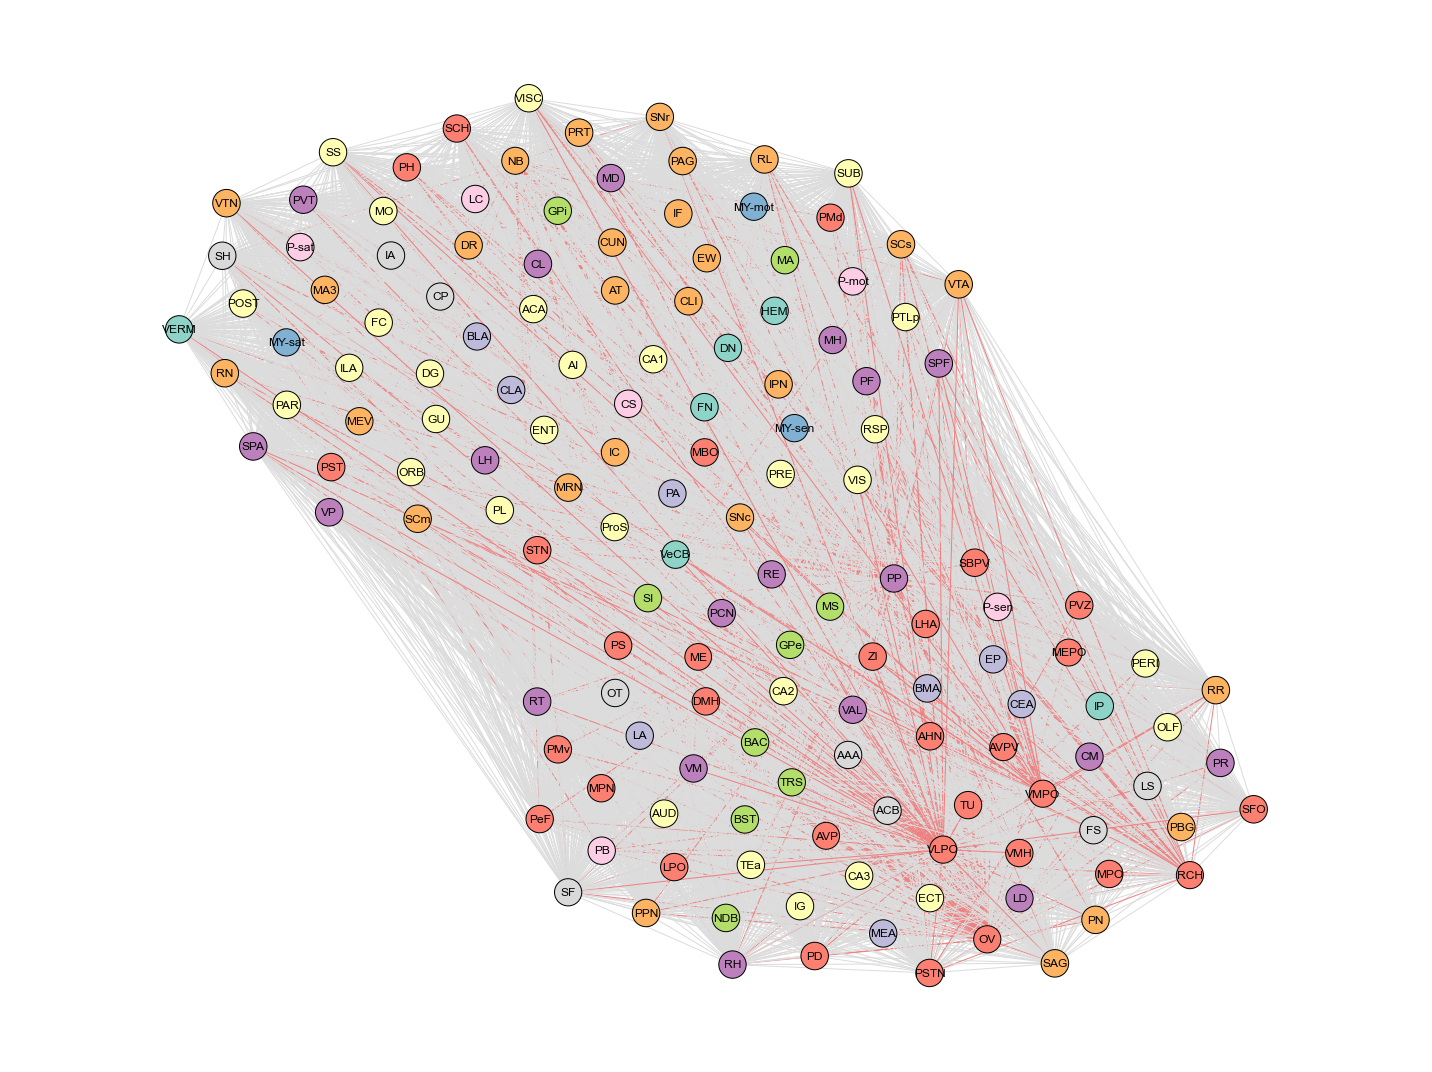

In [65]:
chr2_graph = net.graph_network(chr2_G, my_allen_colors, chr2_pos_dict)

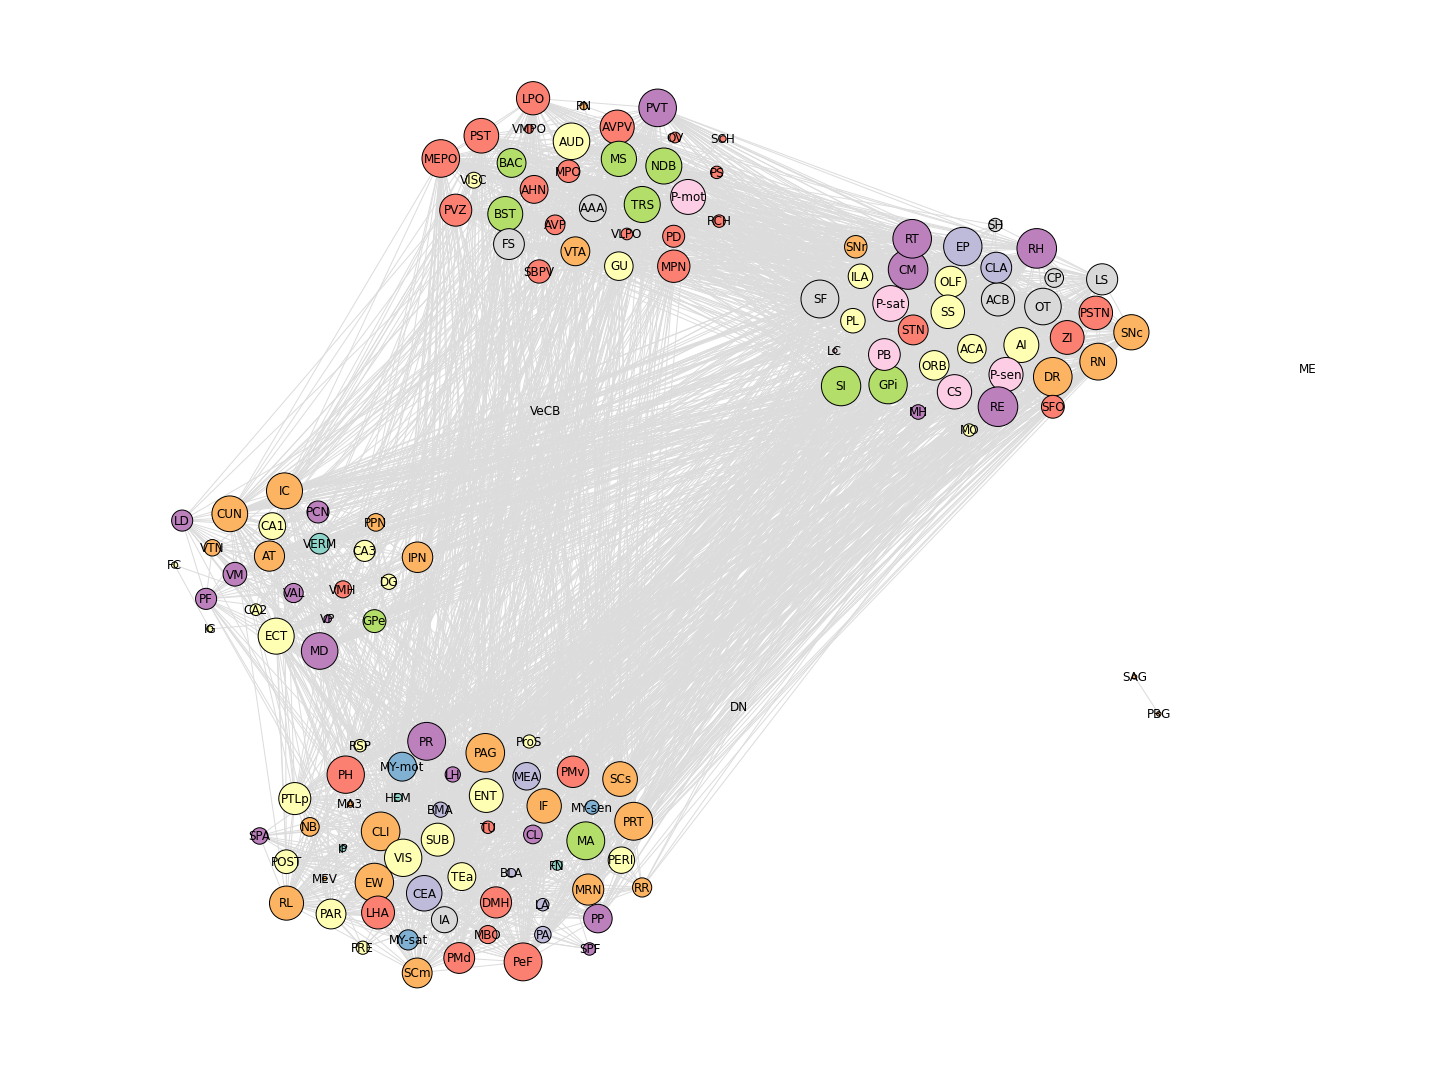

In [22]:
control_lb_graph = net.graph_network(control_lb_G, my_allen_colors, control_lb_pos_dict)

In [27]:
chr2_graph.savefig(r'C:\Users\Ryan Senne\Desktop\chr2_lb_network.svg')

In [32]:
control_graph.savefig(r'C:\Users\Ryan Senne\Desktop\control_network.svg')

In [23]:
control_lb_graph.savefig(r'C:\Users\Ryan Senne\Desktop\control_lb_network.svg')

In [18]:
ir_graph.savefig(r'C:\Users\Ryan Senne\Desktop\control_lb_network.svg')

In [18]:
control_node_df = net.grab_node_attributes(control_G, use_distance=False, compress_to_df=True)
chr2_node_df = net.grab_node_attributes(chr2_G, use_distance=False, compress_to_df=True)

control_results, control_hubs = net.findMyHubs(control_node_df)
chr2_results, chr2_hubs = net.findMyHubs(chr2_node_df)

In [19]:
control_hubs

Degree  Betweenness  Eigenvector_Centrality  Closeness  \
VIS   0.493151     0.018847                0.121086   0.605205   
PH    0.493151     0.018847                0.121086   0.605205   
MD    0.472603     0.024776                0.116566   0.605205   
EW    0.520548     0.009928                0.139116   0.621786   
RH    0.554795     0.011605                0.142090   0.633355   
MEPO  0.500000     0.015998                0.132127   0.610633   
IC    0.458904     0.020242                0.117784   0.592049   
EP    0.520548     0.010377                0.134033   0.610633   
ECT   0.458904     0.021767                0.109142   0.586945   
TRS   0.458904     0.015690                0.121996   0.599873   
CM    0.554795     0.011605                0.142090   0.633355   
SF    0.506849     0.006354                0.136639   0.610633   
PRT   0.506849     0.008685                0.132744   0.613384   
RT    0.527397     0.009556                0.136467   0.618960   
SI    0.547945     0.009361                0.142153   0.627517   
RN    0.479452     0.004740                0.131051   0.602528   
RE    0.554795     0.009310                0.145652   0.633355   
PeF   0.506849     0.006697                0.135652   0.613384   
PVT   0.500000     0.008982                0.131235   0.610633   
AUD   0.472603     0.005367                0.128502   0.589486   
PR    0.506849     0.008685                0.132744   0.613384   
PAG   0.527397     0.005947                0.140642   0.621786   
CLI   0.527397     0.005947                0.140642   0.621786   
NDB   0.458904     0.007795                0.122335   0.589486   
MS    0.438356     0.014944                0.120084   0.589486   
MA    0.506849     0.006697                0.135652   0.613384   
GPi   0.520548     0.008316                0.137688   0.616159   
DR    0.527397     0.005947                0.140642   0.621786   
CUN   0.452055     0.004892                0.121480   0.586945   
OT    0.472603     0.007409                0.124096   0.594634   

      Clustering_Coefficient  Hub_Score  
VIS                 0.570423          5  
PH                  0.570423          5  
MD                  0.583973          5  
EW                  0.657193          4  
RH                  0.598148          4  
MEPO                0.650685          4  
IC                  0.624152          4  
EP                  0.619649          4  
ECT                 0.559475          4  
TRS                 0.666214          4  
CM                  0.598148          4  
SF                  0.670122          3  
PRT                 0.636061          3  
RT                  0.625427          3  
SI                  0.621203          3  
RN                  0.693996          3  
RE                  0.634259          3  
PeF                 0.655313          3  
PVT                 0.649924          3  
AUD                 0.687127          3  
PR                  0.636061          3  
PAG                 0.644566          3  
CLI                 0.644566          3  
NDB                 0.673903          3  
MS                  0.699901          3  
MA                  0.655313          3  
GPi                 0.645263          3  
DR                  0.644566          3  
CUN                 0.678322          3  
OT                  0.655158          3

In [60]:
chr2_hubs = chr2_hubs.index.tolist()

In [5]:
ir_node_df = net.grab_node_attributes(ir_G, use_distance=False, compress_to_df=True)
ir_results, ir_hubs = net.findMyHubs(ir_node_df)

In [24]:
ir_hubs.to_csv(r'C:\Users\Ryan Senne\Desktop\ir_hubs.csv')

In [24]:
control_lb_node_df = net.grab_node_attributes(control_lb_G, use_distance=False, compress_to_df=True)

control_lb_results, control_lb_hubs = net.findMyHubs(control_lb_node_df)

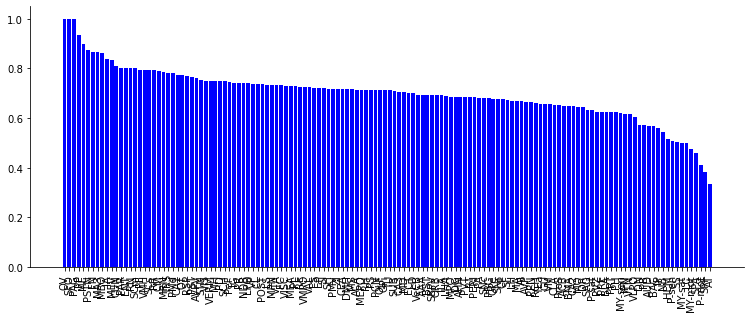

In [11]:
chr2_degree_bar = net.plot_network_statistic(chr2_node_df, statistic='Clustering_Coefficient', cutoff=0.0)
chr2_degree_bar[0].savefig(r'C:\Users\Ryan Senne\Desktop\chr2_Clustering_bar.svg')

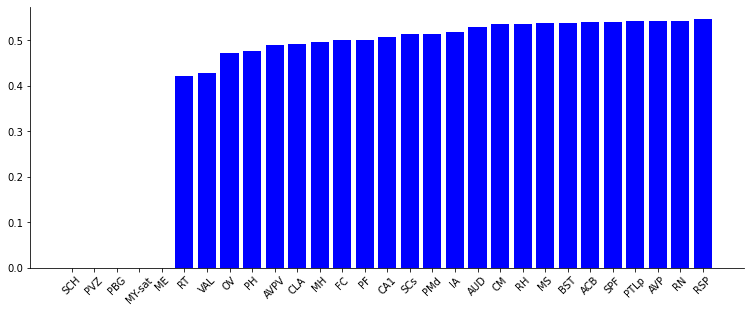

In [10]:
control_degree_bar = net.plot_network_statistic(control_node_df, statistic='Clustering_Coefficient')
control_degree_bar[0].savefig(r'C:\Users\Ryan Senne\Desktop\control_Clustering_Coefficient_bar.svg')

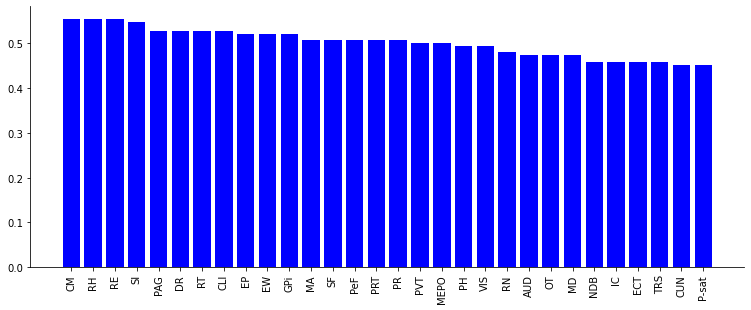

In [26]:
control_lb_degree_bar = net.plot_network_statistic(control_lb_node_df, statistic='Degree')
control_lb_degree_bar[0].savefig(r'C:\Users\Ryan Senne\Desktop\control_Clustering_Coefficient_bar.svg')

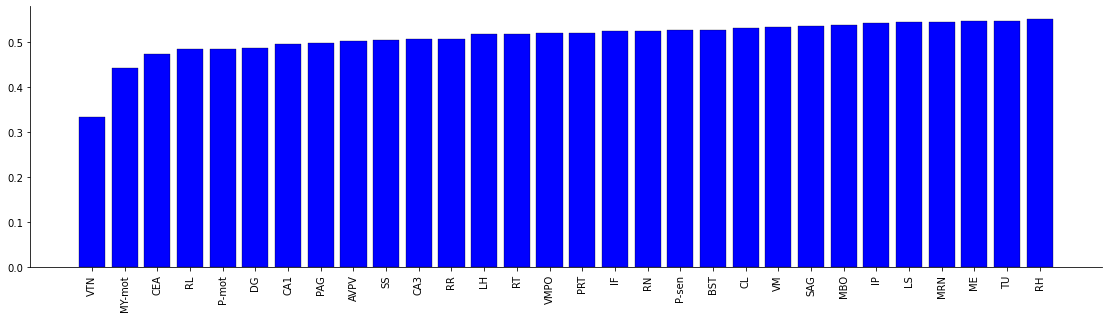

In [6]:
ir_sb_degree_bar = net.plot_network_statistic(ir_node_df, statistic='Clustering_Coefficient')
ir_sb_degree_bar[0].savefig(r'C:\Users\Ryan Senne\Desktop\ir_clust_coef_bar.svg', transparent=True)

In [32]:
control_hubs

Degree  Betweenness  Eigenvector_Centrality  Closeness  \
ACB     0.479452     0.014779                0.136714   0.623406   
IA      0.554795     0.018770                0.160565   0.654577   
RN      0.486301     0.017544                0.139923   0.634391   
SCs     0.500000     0.020048                0.141298   0.631609   
MS      0.500000     0.018400                0.144760   0.610199   
PTLp    0.479452     0.012107                0.138227   0.605071   
BST     0.465753     0.014613                0.131959   0.618055   
CA1     0.582192     0.020538                0.167743   0.654577   
BMA     0.431507     0.008205                0.120695   0.573732   
ILA     0.424658     0.016160                0.122977   0.602539   
ProS    0.472603     0.012515                0.139167   0.612795   
MO      0.431507     0.008205                0.120695   0.573732   
MRN     0.452055     0.016495                0.127739   0.620719   
CEA     0.479452     0.013781                0.138364   0.600029   
SH      0.404110     0.012180                0.115974   0.585394   
PRE     0.493151     0.010561                0.146155   0.612795   
PR      0.397260     0.009284                0.117361   0.592621   
POST    0.424658     0.010342                0.118670   0.571456   
TRS     0.390411     0.010059                0.118825   0.590192   
CA3     0.404110     0.011082                0.121477   0.597539   
OLF     0.424658     0.008680                0.127462   0.605071   
SPA     0.465753     0.009438                0.136741   0.597539   
LA      0.424658     0.011529                0.121516   0.597539   
SUB     0.397260     0.008502                0.116155   0.585394   
CS      0.452055     0.011541                0.127811   0.583024   
SPF     0.239726     0.028644                0.055692   0.503520   
MY-sat  0.013699     0.013604                0.000500   0.311030   
PMd     0.239726     0.028937                0.057887   0.521764   
PH      0.047945     0.019871                0.002785   0.369248   
MY-sen  0.410959     0.008782                0.120885   0.562527   
AI      0.390411     0.006279                0.113623   0.560338   
MD      0.363014     0.012241                0.098438   0.573732   
GU      0.390411     0.006279                0.113623   0.560338   
BLA     0.410959     0.008186                0.119596   0.564733   
VIS     0.417808     0.006766                0.118628   0.562527   

        Clustering_Coefficient  Hub_Score  
ACB                   0.540787          5  
IA                    0.519136          5  
RN                    0.543260          5  
SCs                   0.514079          5  
MS                    0.537291          5  
PTLp                  0.542857          5  
BST                   0.537313          5  
CA1                   0.507843          5  
BMA                   0.546339          4  
ILA                   0.568482          4  
ProS                  0.560529          4  
MO                    0.546339          4  
MRN                   0.550117          4  
CEA                   0.546584          4  
SH                    0.562829          4  
PRE                   0.559859          3  
PR                    0.604961          3  
POST                  0.552089          3  
TRS                   0.620927          3  
CA3                   0.588545          3  
OLF                   0.599154          3  
SPA                   0.562774          3  
LA                    0.553675          3  
SUB                   0.592861          3  
CS                    0.550583          3  
SPF                   0.541176          2  
MY-sat                0.000000          2  
PMd                   0.514286          2  
PH                    0.476190          2  
MY-sen                0.585311          2  
AI                    0.581454          2  
MD                    0.566038          2  
GU                    0.581454          2  
BLA                   0.584181          2  
VIS                  

In [48]:
chr2_hubs

NameError: name 'chr2_hubs' is not defined

In [25]:
control_lb_hubs

Degree  Betweenness  Eigenvector_Centrality  Closeness  \
VIS   0.493151     0.018847                0.121086   0.605205   
PH    0.493151     0.018847                0.121086   0.605205   
MD    0.472603     0.024776                0.116566   0.605205   
EW    0.520548     0.009928                0.139116   0.621786   
RH    0.554795     0.011605                0.142090   0.633355   
MEPO  0.500000     0.015998                0.132127   0.610633   
IC    0.458904     0.020242                0.117784   0.592049   
EP    0.520548     0.010377                0.134033   0.610633   
ECT   0.458904     0.021767                0.109142   0.586945   
TRS   0.458904     0.015690                0.121996   0.599873   
CM    0.554795     0.011605                0.142090   0.633355   
SF    0.506849     0.006354                0.136639   0.610633   
PRT   0.506849     0.008685                0.132744   0.613384   
RT    0.527397     0.009556                0.136467   0.618960   
SI    0.547945     0.009361                0.142153   0.627517   
RN    0.479452     0.004740                0.131051   0.602528   
RE    0.554795     0.009310                0.145652   0.633355   
PeF   0.506849     0.006697                0.135652   0.613384   
PVT   0.500000     0.008982                0.131235   0.610633   
AUD   0.472603     0.005367                0.128502   0.589486   
PR    0.506849     0.008685                0.132744   0.613384   
PAG   0.527397     0.005947                0.140642   0.621786   
CLI   0.527397     0.005947                0.140642   0.621786   
NDB   0.458904     0.007795                0.122335   0.589486   
MS    0.438356     0.014944                0.120084   0.589486   
MA    0.506849     0.006697                0.135652   0.613384   
GPi   0.520548     0.008316                0.137688   0.616159   
DR    0.527397     0.005947                0.140642   0.621786   
CUN   0.452055     0.004892                0.121480   0.586945   
OT    0.472603     0.007409                0.124096   0.594634   

      Clustering_Coefficient  Hub_Score  
VIS                 0.570423          5  
PH                  0.570423          5  
MD                  0.583973          5  
EW                  0.657193          4  
RH                  0.598148          4  
MEPO                0.650685          4  
IC                  0.624152          4  
EP                  0.619649          4  
ECT                 0.559475          4  
TRS                 0.666214          4  
CM                  0.598148          4  
SF                  0.670122          3  
PRT                 0.636061          3  
RT                  0.625427          3  
SI                  0.621203          3  
RN                  0.693996          3  
RE                  0.634259          3  
PeF                 0.655313          3  
PVT                 0.649924          3  
AUD                 0.687127          3  
PR                  0.636061          3  
PAG                 0.644566          3  
CLI                 0.644566          3  
NDB                 0.673903          3  
MS                  0.699901          3  
MA                  0.655313          3  
GPi                 0.645263          3  
DR                  0.644566          3  
CUN                 0.678322          3  
OT                  0.655158          3

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

chr2_freeze = pd.read_csv(r"C:\Users\ryansenne\Downloads\chr2_freeze.csv")
control_freeze = pd.read_csv(r"C:\Users\ryansenne\Downloads\control_freeze.csv")
# control_small = pd.read_csv('csv_files/Control_Small_Box.csv')
chr2_small = pd.read_csv('csv_files/ChR2_Small_Box.csv')



In [41]:
from sklearn.linear_model import Lasso




freeze_vec = chr2_freeze['% Freezing Whole']
#
area_data = chr2_small

model = lasso.fit(freeze_vec.to_numpy().reshape(1,-1).transpose(), area_data.to_numpy())

model = sm.OLS(freeze_vec, area_data).fit_regularized(alpha=0.1, L1_wt=1)

#
# area_data = sm.add_constant(chr2_small['ACB'])

# area_data = sm.add_constant(pd.concat([chr2_small, control_small]))dir(model_)




NotImplementedError: 

In [ ]:
model

array([[ 742562.3403029 ,  885115.94174766,  845795.80273244, ...,
         109823.32656238,  -12792.72420195,  244200.15848966],
       [ 265068.27827877,  319640.37791226,  302888.49924889, ...,
          39412.13689071,   -4215.42136344,   87705.34559227],
       [1444103.58224104, 1715920.88968165, 1643443.13331617, ...,
         213272.47363494,  -25394.6226639 ,  474124.62065262],
       ...,
       [ 204206.37829062,  247564.26231409,  233688.95807056, ...,
          30437.45191624,   -3122.14923915,   67758.35062683],
       [ 145179.58502178,  177661.38422677,  166575.91999209, ...,
          21733.37145303,   -2061.84143279,   48412.79703108],
       [ 167442.09569662,  204025.91266274,  191888.23400918, ...,
          25016.19732745,   -2461.74650217,   55709.15466099]])

In [27]:
chr2_small.loc[:, 'Constant'] = 1

In [21]:
chr2_small

AAA           ACA           ACB           AHN            AI  \
0   5322.217690  18286.635675   8637.307222  14545.599115  11344.980170   
1   1902.297775   6277.165974   3894.691826   6800.060527   4404.815013   
2  10346.813922  17810.074555  13058.914585  16851.318510  14600.232175   
3   1984.956234   4428.498228   3368.375629   7154.301062   4584.667345   
4   5208.783866  14362.010425   7384.053771   9707.215077   9217.016553   
5   1466.391152   7114.519830   5103.199866   6933.449456  10629.342787   
6   1043.627977   7263.786910   1060.245245   2030.208584   3530.034929   
7   1203.077088   4034.619208   1934.914941   5750.653533   6205.465853   

            AT           AUD           AVP          AVPV           BAC  ...  \
0  1115.437078  24832.567525   6340.006400   6574.615153  14762.139919  ...   
1   348.332014  21048.254230   7281.081899   2632.143703    131.687243  ...   
2   743.512453  22502.099560  15363.983285  10100.416683   3297.119341  ...   
3     0.000000  13552.166640   6759.636318   6549.823140   1588.477366  ...   
4   162.285503  25711.666315  12673.017803   8720.139409   2658.436214  ...   
5  1112.405907  19319.556875   2568.179547   4230.336600   1993.415638  ...   
6   302.072984  12474.872765   1237.411690    467.285429   1451.851852  ...   
7    92.770658  14799.302240   6554.897424   4342.789787   2638.683127  ...   

           VLPO           VM           VMH          VMPO           VP  \
0   5143.737536  3334.592037   9371.035708  11789.431839  1901.507752   
1   6082.123073  1382.412548   8103.648353   6423.922786  1815.026768   
2   6463.567044  3216.944868   9226.980366  12258.098827  2785.604861   
3   6169.701552   989.319663   5769.239220   9851.770619  1377.256777   
4  12029.972583  1542.455193  10651.819311  12616.480998  1373.397230   
5   2486.796404  2152.760747  10253.754420   7116.550681  2559.819135   
6   1207.467946   103.617425    491.437479   2334.080351    80.082365   
7   4804.553413   181.340758   2485.478185   3829.037108   162.980466   

           VTA          VTN         VeCB           ZI  Constant  
0  1597.363861  3002.348254    23.481994  3899.501561         1  
1   743.732795    79.129012  3386.834995  1053.459409         1  
2  1218.471032  2212.196684   117.526281  4235.616683         1  
3  1389.228867     0.000000     0.000000  1897.137378         1  
4  1396.220430   502.099196   293.776932  1424.502418         1  
5   703.969107   448.018217     0.000000  1893.127414         1  
6   725.013363   318.793140    23.443223   580.322921         1  
7  1190.447692   238.525582    11.721612  1000.728111         1  

[8 rows x 148 columns]

In [7]:
import statsmodels.api as sm

In [49]:
model = sm.GLM(freeze_vec/100, sm.add_constant(chr2_small['CA1']), family=sm.families.Binomial())

In [50]:
model_fit = model.fit()

In [51]:
print(model_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       % Freezing Whole   No. Observations:                    8
Model:                            GLM   Df Residuals:                        6
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3.2221
Date:                Tue, 31 Jan 2023   Deviance:                      0.68839
Time:                        17:35:38   Pearson chi2:                    0.707
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05628
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0076      1.949     -1.030      0.3

(array([2., 0., 0., 0., 1., 2., 0., 0., 1., 1.]),
 array([-12.7245591 ,  -8.52663579,  -4.32871249,  -0.13078918,
          4.06713412,   8.26505743,  12.46298074,  16.66090404,
         20.85882735,  25.05675065,  29.25467396]),
 <BarContainer object of 10 artists>)

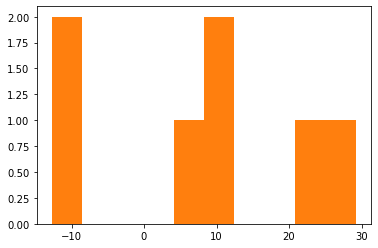

In [163]:
# plt.scatter(area_data['SNr'], freeze_vec)

plt.hist(model_fit.resid[0:7])
plt.hist(model_fit.resid[0:7])

In [155]:
import matplotlib.pyplot as plt

In [41]:
from sklearn.pipeline import Pipeline
import networkx as nx
import umap
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import count
from tqdm.notebook import tqdm
# from tqdm import tqdm

class GraphPartitioner:
    def __init__(self, graph, umap_min_dist=0.1, umap_n_neighbors=100,
                 dbscan_eps=0.5, dbscan_min_samples=2):
        self.graph = graph
        self.umap_min_dist = umap_min_dist
        self.umap_n_neighbors = umap_n_neighbors
        self.dbscan_eps = dbscan_eps
        self.dbscan_min_samples = dbscan_min_samples
        self.partitions = None
        self.embedding = None

    def fit(self):
        # Compute adjacency matrix
        adj_matrix = nx.to_numpy_array(self.graph)

        # Perform UMAP on adjacency matrix
        self.embedding = umap.UMAP(n_neighbors=self.umap_n_neighbors, min_dist=self.umap_min_dist).fit_transform(adj_matrix)

        # Perform DBSCAN on UMAP embedding
        db = DBSCAN(eps=self.dbscan_eps, min_samples=self.dbscan_min_samples).fit(self.embedding)
        labels = db.labels_

        # Create dictionary of partition nodes
        partitions = {}
        for node, label in zip(self.graph.nodes(), labels):
            partitions.setdefault(label, set()).add(node)

        # Assign a unique partition id to each partition
        self.partitions = {}
        for partition_id, nodes in zip(count(), partitions.values()):
            self.partitions[partition_id] = set(nodes)

    def measure_quality(self):
        if self.partitions is None:
            raise ValueError("Partitions have not been computed yet. Call the 'fit' method first.")

        # Compute modularity score for the partitions
        modularity = nx.algorithms.community.modularity(self.graph, self.partitions.values())

        # Compute silhouette score for the partition labels
        labels = [self.get_partition_label(node) for node in self.graph.nodes()]
        silhouette = silhouette_score(nx.to_numpy_array(self.graph), labels)

        return modularity, silhouette

    def get_partition_label(self, node):
        if self.partitions is None:
            raise ValueError("Partitions have not been computed yet. Call the 'fit' method first.")

        for partition_id, nodes in self.partitions.items():
            if node in nodes:
                return partition_id

        raise ValueError(f"Node {node} not found in any partition.")

    def plot_results(self):
        if self.embedding is None:
            raise ValueError("Embedding has not been computed yet. Call the 'fit' method first.")

        if self.partitions is None:
            raise ValueError("Partitions have not been computed yet. Call the 'fit' method first.")

        # Create scatter plot of UMAP embedding
        fig, ax = plt.subplots()
        ax.scatter(self.embedding[:, 0], self.embedding[:, 1], c=[self.get_partition_label(node) for node in self.graph.nodes()])
        ax.set_title("UMAP embedding with DBSCAN partitions")
        ax.set_xlabel("UMAP dimension 1")
        ax.set_ylabel("UMAP dimension 2")
        plt.show()



In [42]:
# Create a random graph
graph = nx.fast_gnp_random_graph(n=40, p=0.2, seed=42)

# Create the partitioner object
partitioner = GraphPartitioner(chr2_G)

# Compute the partitions
partitioner.fit()

# Measure the quality of the partitions
modularity, silhouette = partitioner.measure_quality()
print(f"Modularity: {modularity}")
print(f"Silhouette: {silhouette}")

# Get the partition label of a node
node = 0
partition_label = partitioner.get_partition_label(node)
print(f"Node {node} is in partition {partition_label}")

Modularity: 0.14388500515408767
Silhouette: 0.1890470513680078


ValueError: Node 0 not found in any partition.

In [ ]:
partitioner.search_parameters()

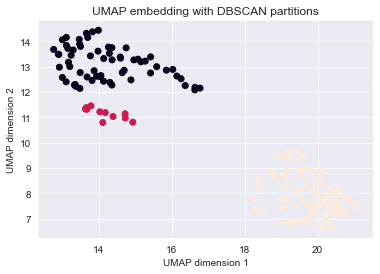

In [36]:
partitioner.plot_results()

In [178]:
partitioner.partitions

{0: {'AAA',
  'ACA',
  'AI',
  'BLA',
  'CA3',
  'CEA',
  'CL',
  'CLA',
  'CM',
  'CP',
  'DG',
  'ECT',
  'EP',
  'FS',
  'GPe',
  'GPi',
  'IA',
  'ILA',
  'IPN',
  'LD',
  'LHA',
  'LS',
  'MA',
  'MBO',
  'MD',
  'MEA',
  'MH',
  'MO',
  'OLF',
  'ORB',
  'OT',
  'P-mot',
  'P-sen',
  'PCN',
  'PERI',
  'PF',
  'PH',
  'PL',
  'PMd',
  'PMv',
  'PR',
  'PSTN',
  'PVZ',
  'RE',
  'RH',
  'RN',
  'RT',
  'SF',
  'SFO',
  'SNc',
  'SNr',
  'SS',
  'STN',
  'TRS',
  'TU',
  'VAL',
  'VERM',
  'VISC',
  'VM',
  'VMH',
  'VP',
  'VTA',
  'ZI'},
 1: {'ACB', 'BAC', 'BST', 'CA2', 'DMH', 'IG', 'PN', 'PPN', 'PeF', 'SAG', 'SI'},
 2: {'AHN',
  'AT',
  'AUD',
  'AVP',
  'AVPV',
  'BMA',
  'CA1',
  'CLI',
  'CS',
  'CUN',
  'DN',
  'DR',
  'ENT',
  'EW',
  'FC',
  'FN',
  'GU',
  'HEM',
  'IC',
  'IF',
  'IP',
  'LA',
  'LC',
  'LH',
  'LPO',
  'MA3',
  'ME',
  'MEPO',
  'MEV',
  'MPN',
  'MPO',
  'MRN',
  'MS',
  'MY-mot',
  'MY-sat',
  'MY-sen',
  'NB',
  'NDB',
  'OV',
  'P-sat',
  'PA',
  'P

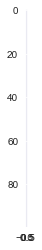

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# generate simulated calcium fluorescence time series
T = 1000  # time points
N = 100  # number of neurons
F = np.random.rand(N, T)  # fluorescence values

# create animation
fig = plt.figure()
ims = []
for i in range(T):
    im = plt.imshow(F[:, i].reshape(-1, 1), cmap='gray', vmin=0, vmax=1)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)

plt.show()

<IPython.core.display.Javascript object>


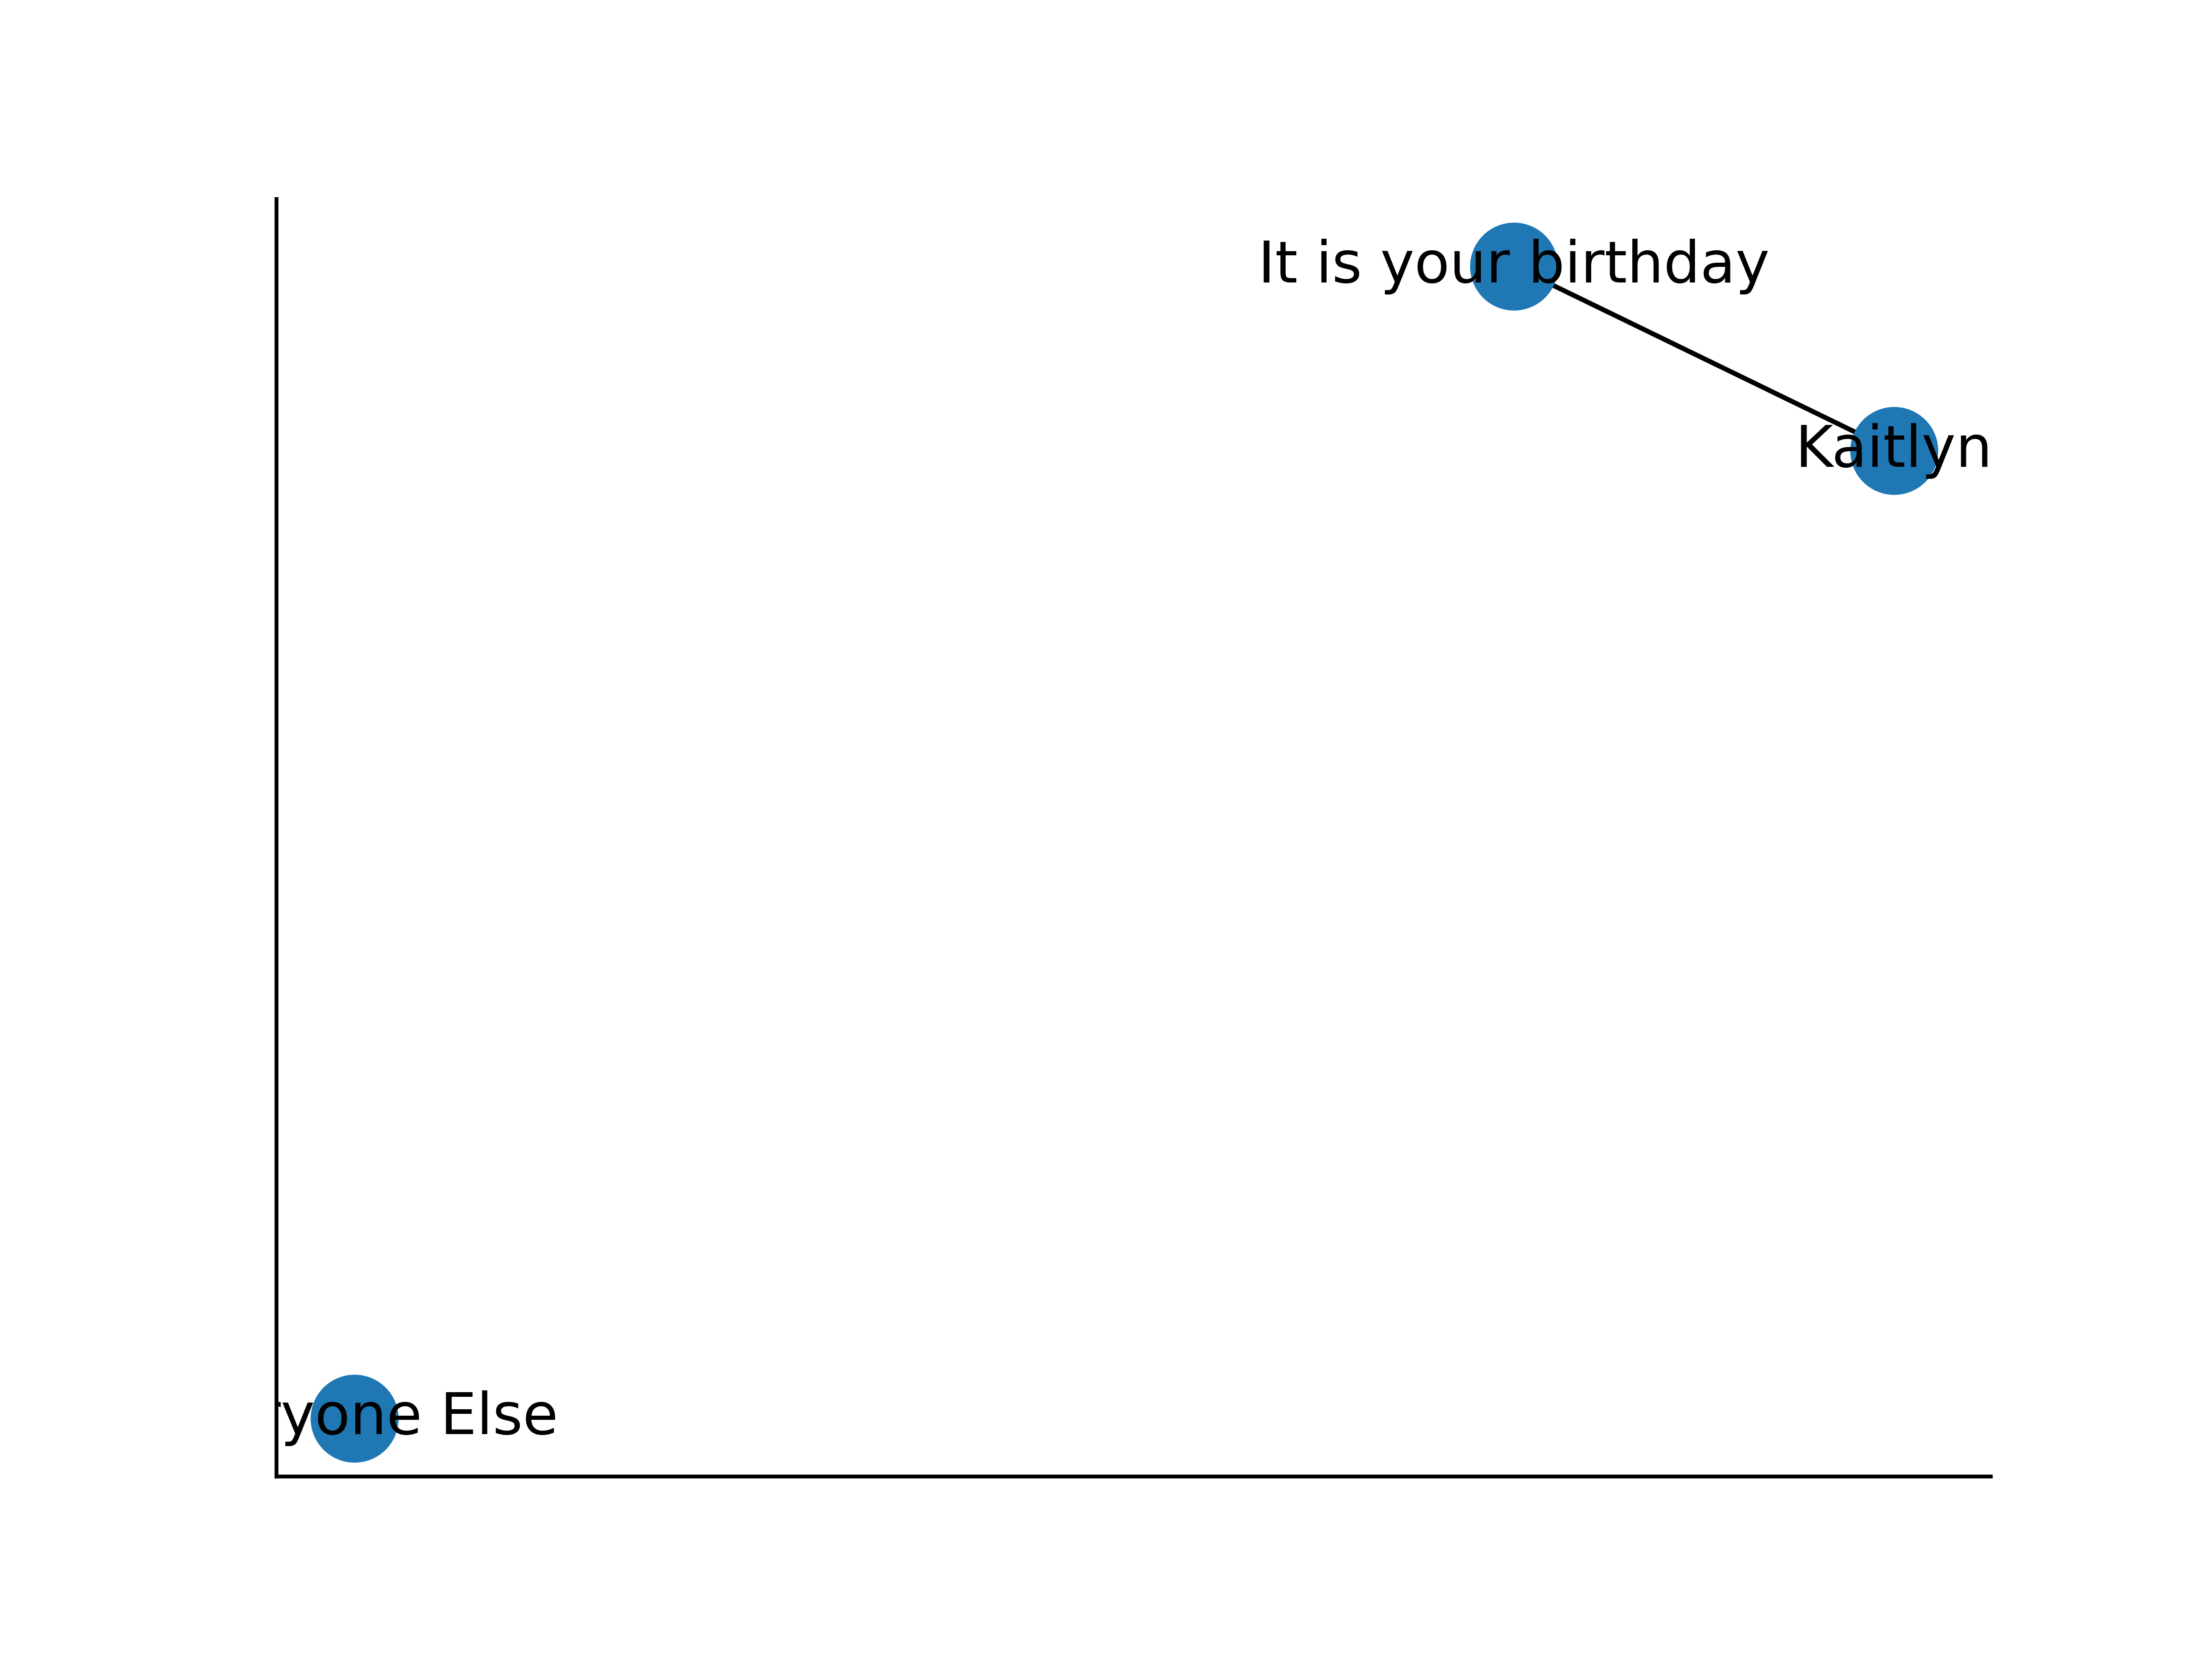

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib notebook
G = nx.Graph()
G.add_nodes_from([('Kaitlyn', {'color':'Green'}),
                 ('Everyone Else', {'color':'Red'}),
                 ('It is your birthday', {'color': 'Blue'})])

G.add_edge('Kaitlyn', 'It is your birthday')

plt.figure()
nx.draw_networkx(G, pos=nx.spring_layout, with_labels=True)


In [ ]:
import numpy as np
from scipy.optimize import minimize
from statsmodels.genmod import families

class GNLM:
    def __init__(self, formula, data, link_function, error_distribution):
        self.formula = formula
        self.data = data
        self.link_function = link_function
        self.error_distribution = error_distribution

    def _log_likelihood(self, parameters):
        # Extract parameter values from input array
        beta = parameters[:-1]
        sigma = parameters[-1]

        # Calculate linear predictor
        X = np.column_stack([self.data[var] for var in self.formula.exog])
        eta = np.dot(X, beta)

        # Apply link function
        mu = self.link_function(eta)

        # Calculate log-likelihood
        y = self.data[self.formula.endog]
        ll = self.error_distribution.loglike(y, mu, scale=sigma)

        return -ll

    def fit(self, start_params=None):
        # Set starting parameter values
        if start_params is None:
            start_params = np.zeros(len(self.formula.exog) + 1)

        # Set bounds on parameter values to ensure positive variance
        bounds = [(None, None)] * len(self.formula.exog) + [(0, None)]

        # Minimize negative log-likelihood
        result = minimize(self._log_likelihood, start_params, bounds=bounds)

        # Extract parameter estimates and standard errors
        beta = result.x[:-1]
        sigma = result.x[-1]
        se = np.sqrt(np.diag(result.hess_inv))

        return GNLMResults(self, beta, sigma, se)


from statsmodels.base.model import Results

class GNLMResults(Results):
    def __init__(self, model, params, scale, bse):
        super().__init__(model)
        self.params = params
        self.scale = scale
        self.bse = bse

    @property
    def normalized_cov_params(self):
        # Covariance matrix of normalized (z-scored) parameters
        return self.model.normalized_cov_params(self.params)

    @property
    def pvalues(self):
        # Two-tailed p-values for parameter estimates
        return 2 * (1 - self.model.cdf(self.params / self.bse))

    def summary(self):
        # Print summary of model results
        print("Generalized Nonlinear Regression Model Results")
        print("=================================================")
        print("Dependent Variable: {}".format(self.model.formula.endog))
        print("Link Function: {}".format(self.model.link_function.__name__))
        print("Error Distribution: {}".format(self.model.error_distribution.__class__.__name__))
        print("Scale: {:.4f}".format(self.scale))
        print("-------------------------------------------------")
        print("Intercept: {:.4f}  (SE = {:.4f}, p = {:.4f})".format(self.params[0], self.bse[0], self.pvalues[0]))
        for i, var in enumerate(self.model.formula.exog):
            print("{}: {:.4f}  (SE = {:.4f}, p = {:.4f})".format(var, self.params[i+1], self.bse[i+1], self.pvalues[i+1]))
